In [1]:
import anndata as ad
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%load_ext autoreload

%autoreload 2
from spatial_compare import  SpatialCompare #spatial_compare, detection_ratio_plots

# Load Data
Here I have taken 4 small regions from different sections of Xenium data from the marmoset brain

In [2]:

# ad_source = ad.read_h5ad("/Users/brianl/projects/marmoset_h5ad/xenium_sis_compare.h5ad")
# ad_10x = ad_source[ad_source.obs.segmentation=="10x"]

# msn_mask_0 = ad_10x.obs["level1.class_label_name"] == "MSN"

# ad0 = ad_10x[msn_mask_0]


# ad_sis= ad_source[ad_source.obs.segmentation=="spots_in_space"]
# msn_mask_1 = ad_sis.obs["level1.class_label_name"] == "MSN"
# ad1 = ad_sis[msn_mask_1]    

ad1 = ad.read_h5ad("data/CJ_BG_mini1.h5ad")
ad2 = ad.read_h5ad("data/CJ_BG_mini2.h5ad")
ad3 = ad.read_h5ad("data/CJ_BG_mini3.h5ad")
ad4 = ad.read_h5ad("data/CJ_BG_mini4.h5ad")

# the anndata objects used in `spatial_compare` need a few things:

1. a category (column in .obs shared in both AnnData objects )
2. an .obsm key where spatial location data is stored

the user supplies names for the 2  AnnData objects. Here I'm comparing 2 segmentations

In [75]:
sc = SpatialCompare(ad1, ad2, data_names=["mini1", "mini2"], category='AIT15_Subclass_name')

input anndata objects have 541 shared genes


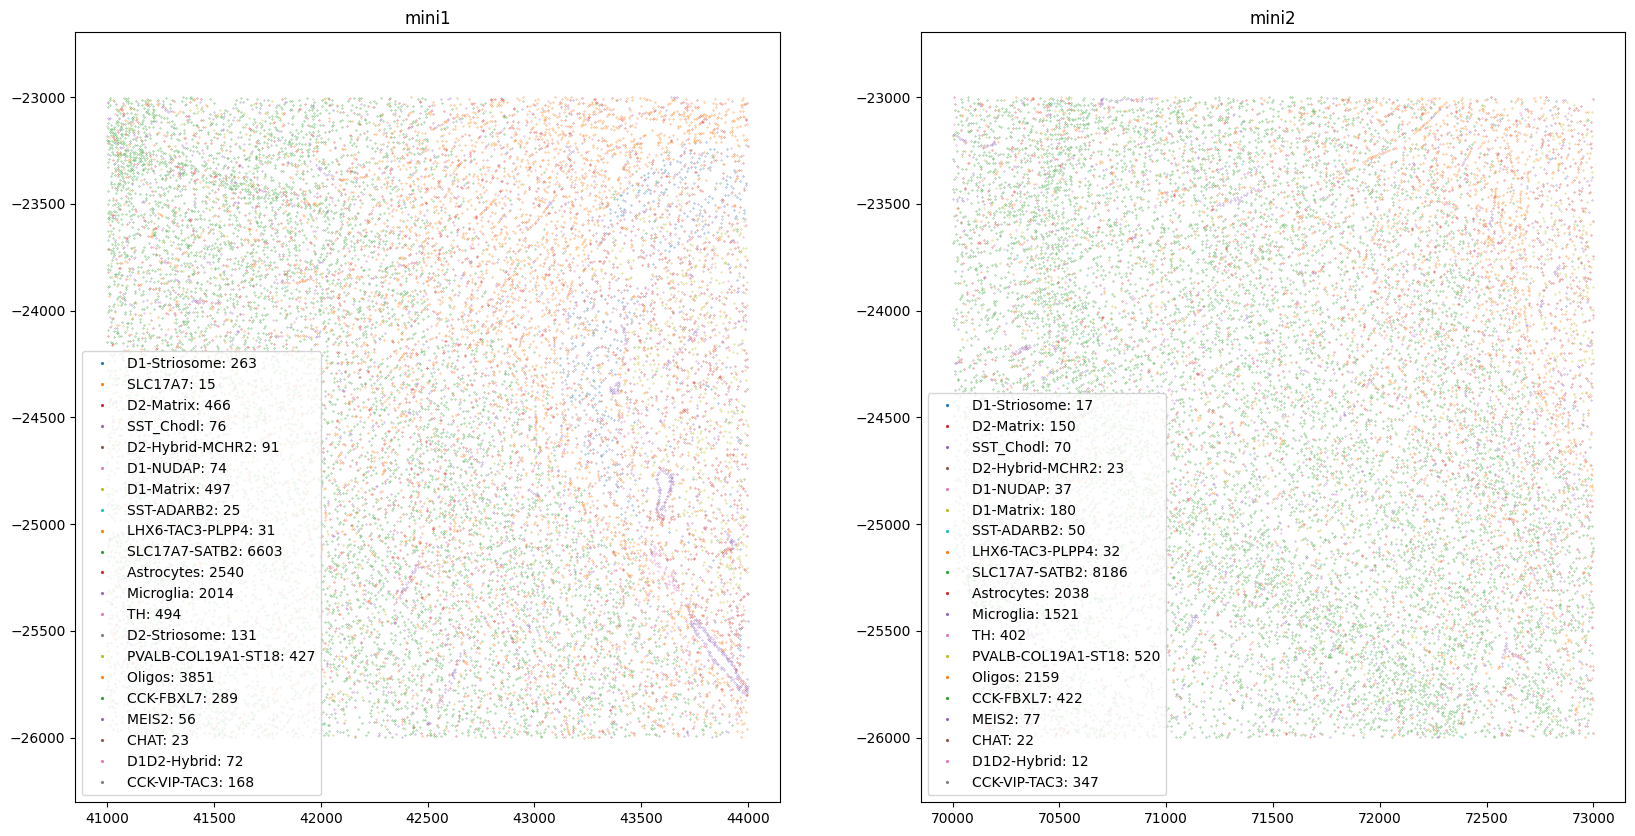

In [20]:
sc.spatial_plot()

at least 1 input has less than 10 in AIT15_Subclass_name == D2-Striosome
at least 1 input has less than 10 in AIT15_Subclass_name == SLC17A7
at least 1 input has less than 10 in AIT15_Subclass_name == TAC3-LHX8-PLPP4
at least 1 input has less than 10 in AIT15_Subclass_name == D1-ShellOT
at least 1 input has less than 10 in AIT15_Subclass_name == GABA_Gluta_PVALB-Meis2
at least 1 input has less than 10 in AIT15_Subclass_name == Gluta_PVALB-CDH23
at least 1 input has less than 10 in AIT15_Subclass_name == SN_STH_GPe-MEIS2-OTX2
at least 1 input has less than 10 in AIT15_Subclass_name == NAc-LHX8
at least 1 input has less than 10 in AIT15_Subclass_name == D2-ShellOT


{'category_top_values': ['SLC17A7-SATB2',
  'Oligos',
  'Astrocytes',
  'Microglia',
  'D1-Matrix',
  'TH',
  'D2-Matrix',
  'PVALB-COL19A1-ST18',
  'CCK-FBXL7',
  'D1-Striosome',
  'CCK-VIP-TAC3',
  'D2-Striosome',
  'D2-Hybrid-MCHR2',
  'SST_Chodl',
  'D1-NUDAP',
  'D1D2-Hybrid',
  'MEIS2',
  'LHX6-TAC3-PLPP4',
  'SST-ADARB2',
  'CHAT',
  'SLC17A7',
  'TAC3-LHX8-PLPP4',
  'D1-ShellOT',
  'GABA_Gluta_PVALB-Meis2',
  'Gluta_PVALB-CDH23',
  'SN_STH_GPe-MEIS2-OTX2',
  'NAc-LHX8',
  'D2-ShellOT'],
 'category': 'AIT15_Subclass_name',
 'proportion_correlation': 0.9560710812184235,
 'n0':                         cell_id
 AIT15_Subclass_name            
 SLC17A7-SATB2              6603
 Oligos                     3851
 Astrocytes                 2540
 Microglia                  2014
 D1-Matrix                   497
 TH                          494
 D2-Matrix                   466
 PVALB-COL19A1-ST18          427
 CCK-FBXL7                   289
 D1-Striosome                263
 CCK-VIP-TAC3  

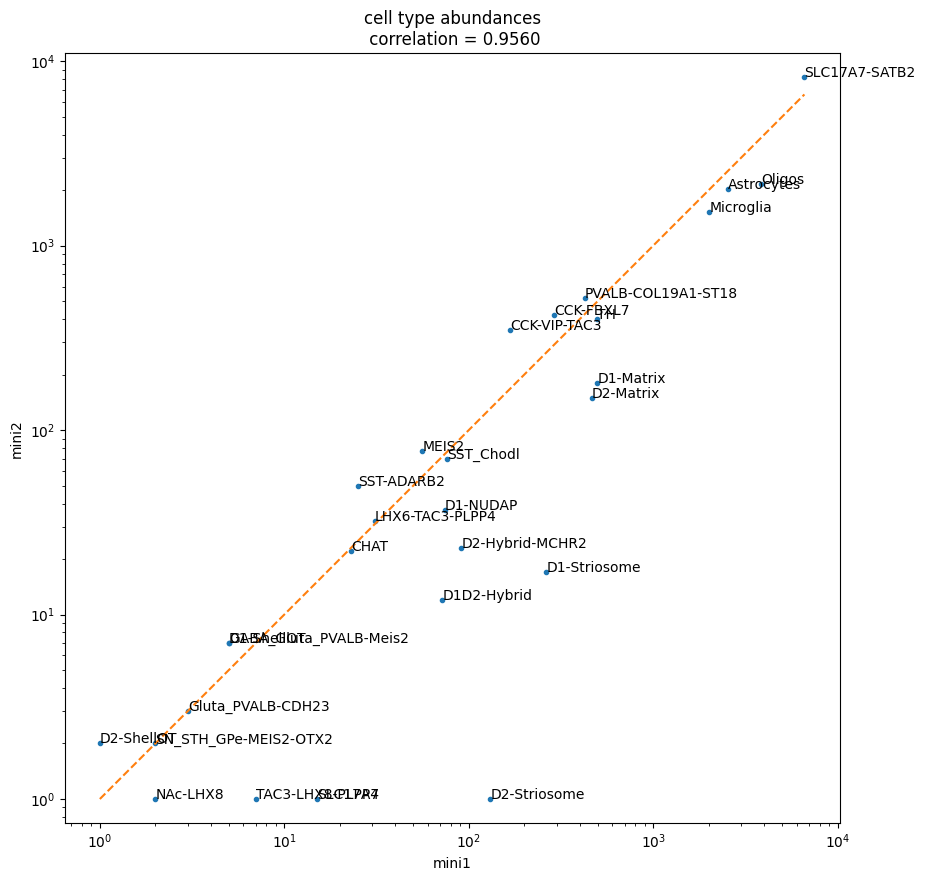

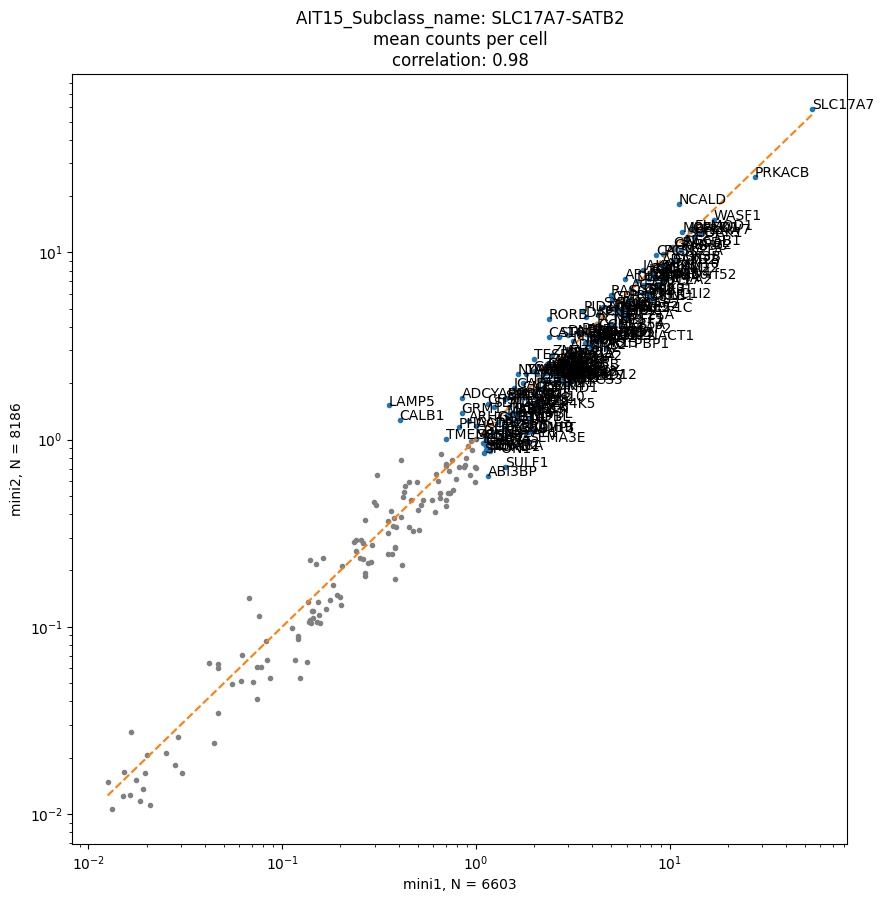

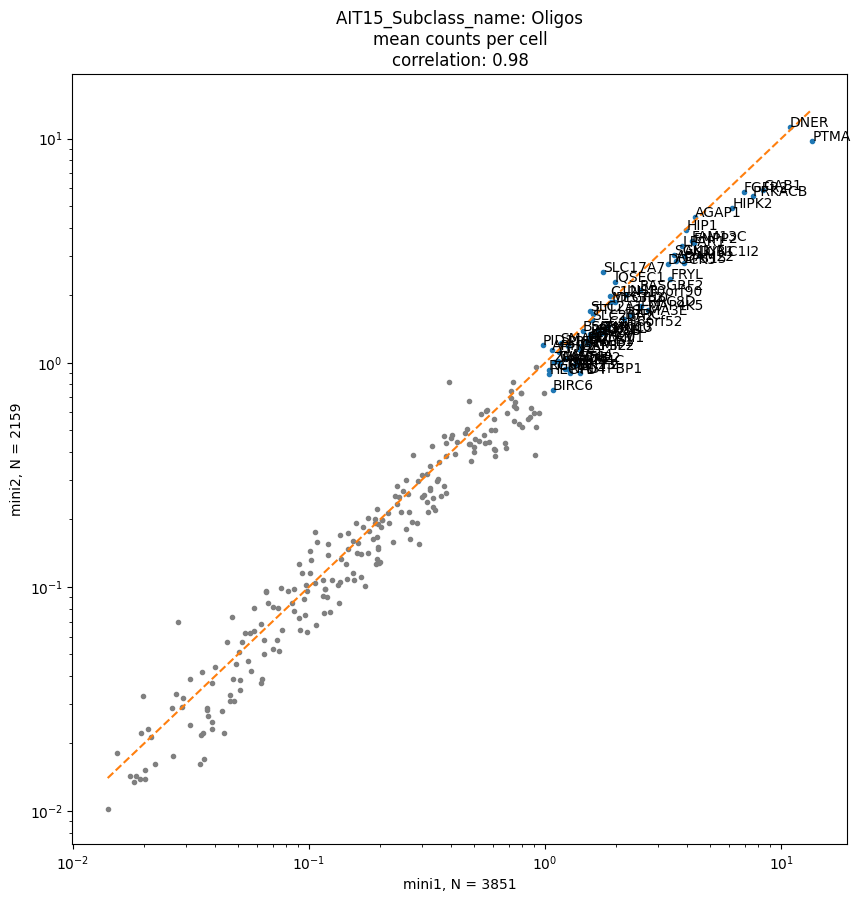

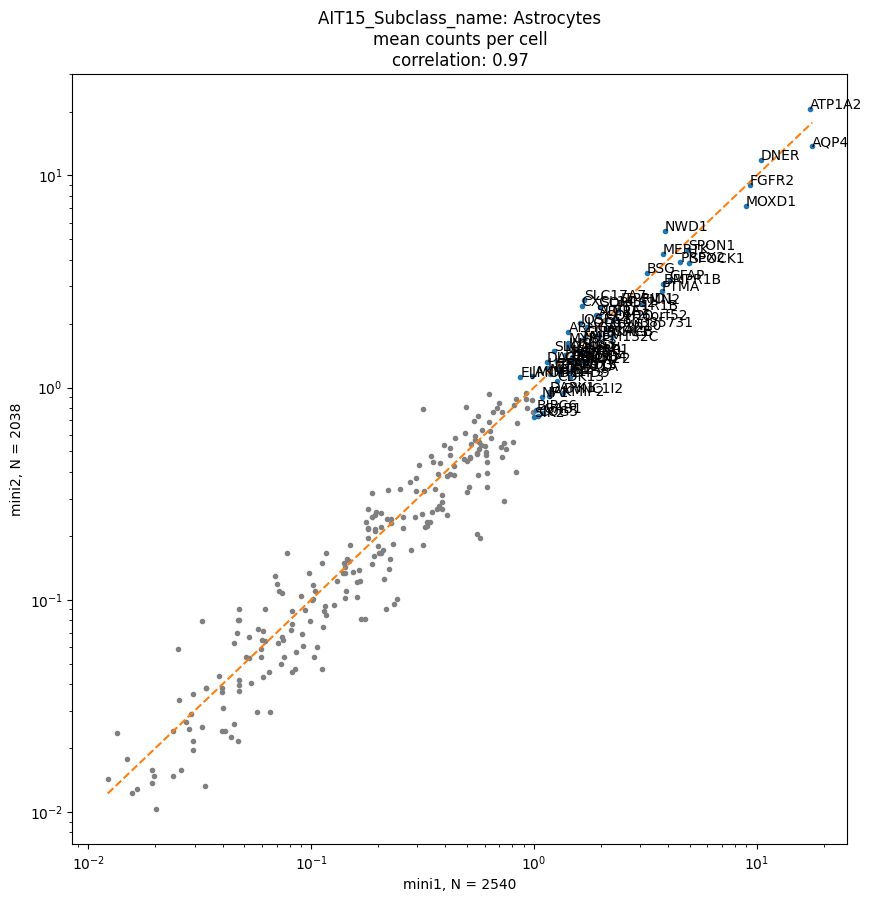

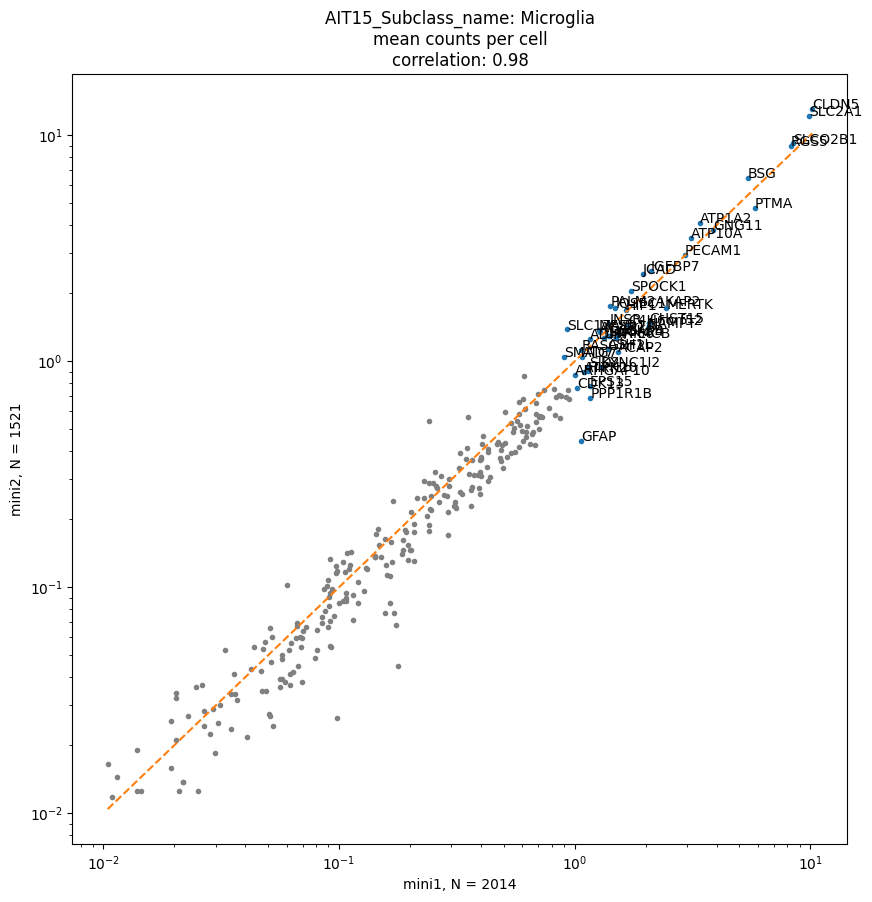

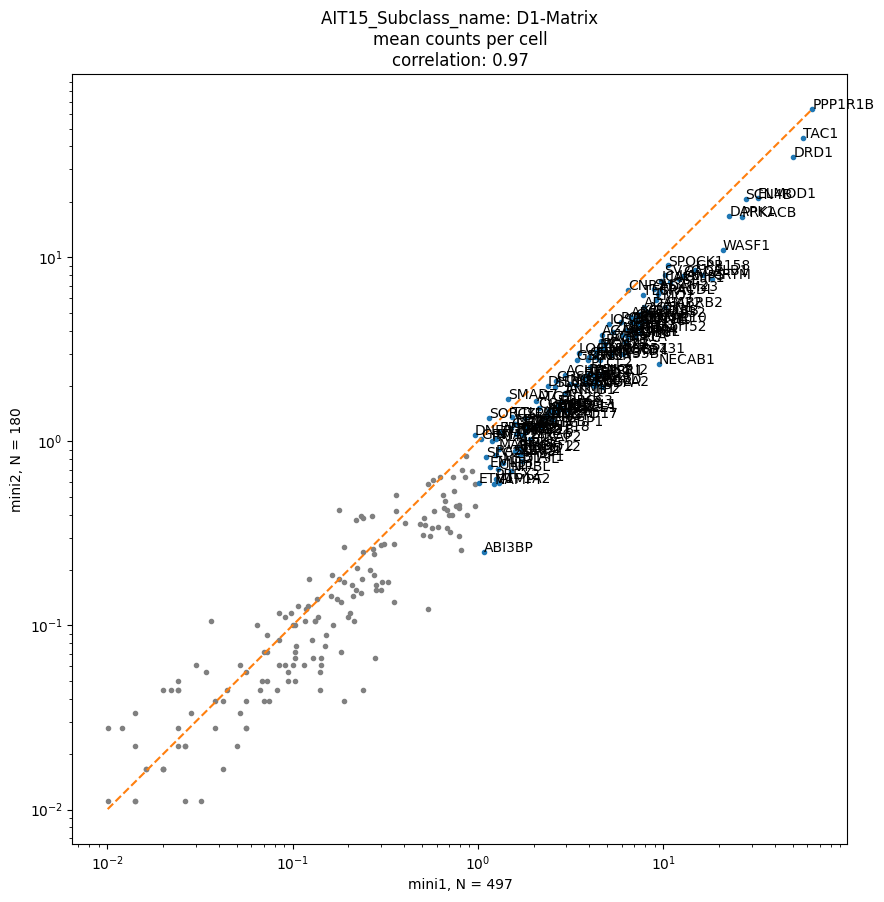

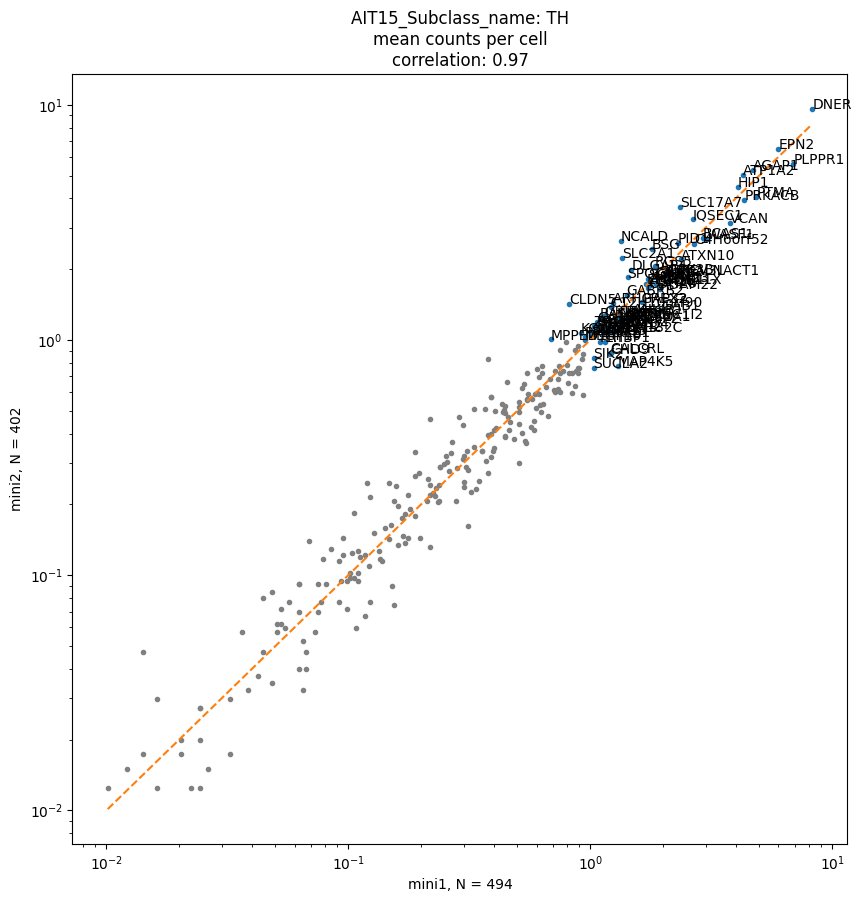

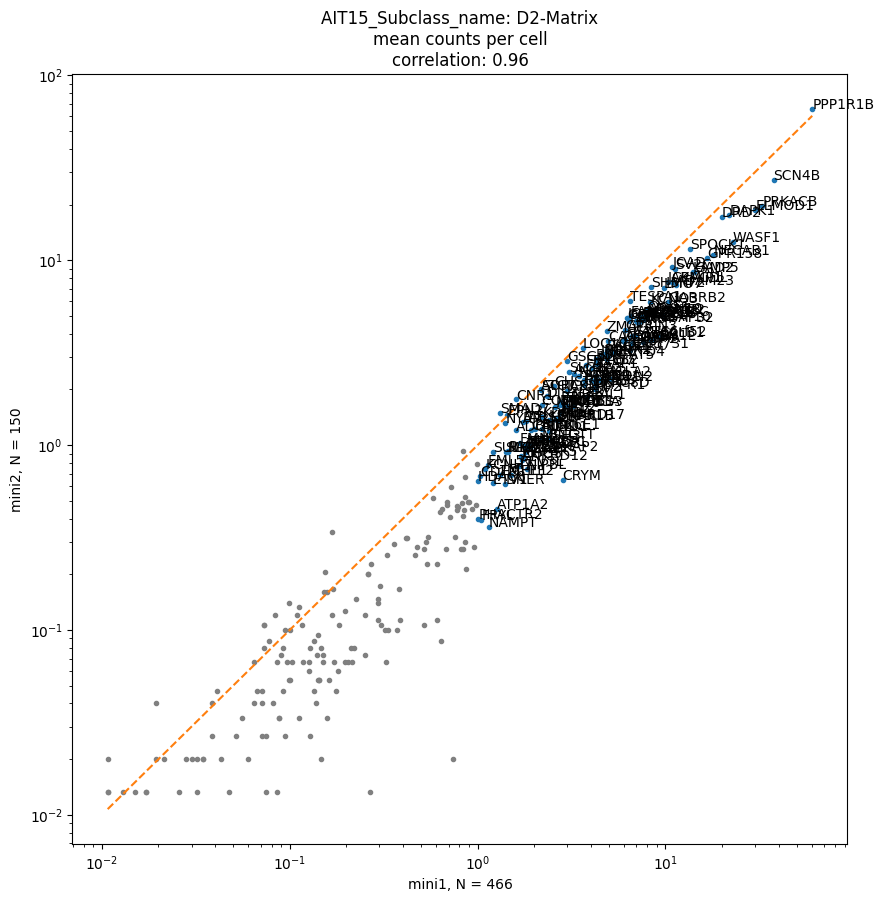

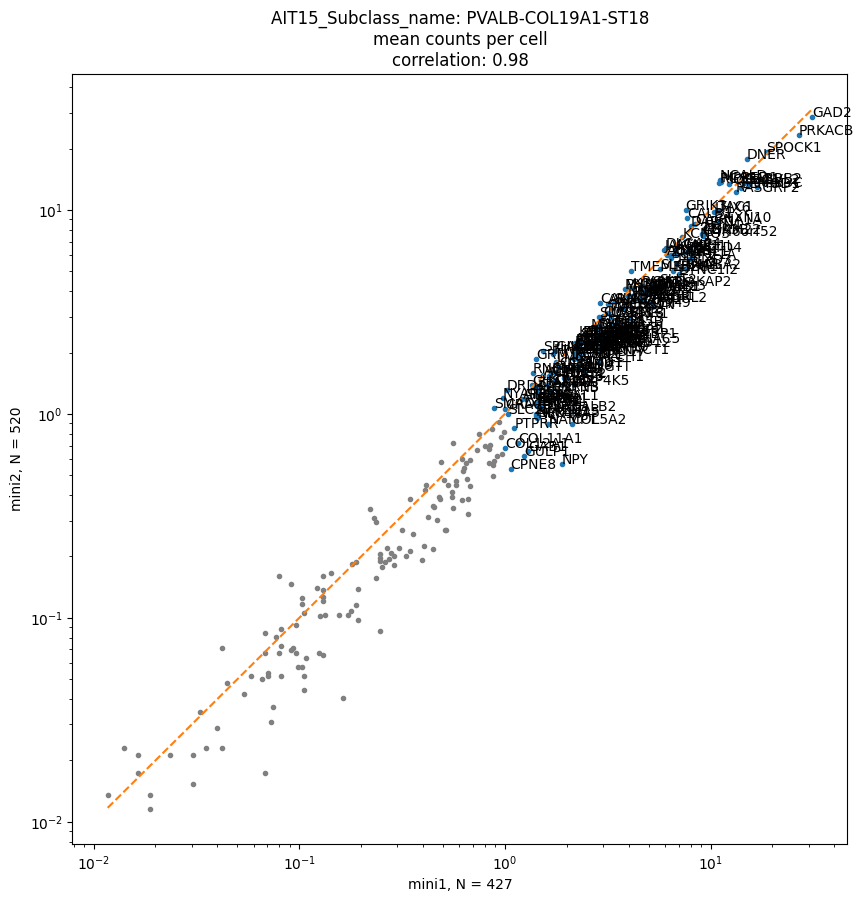

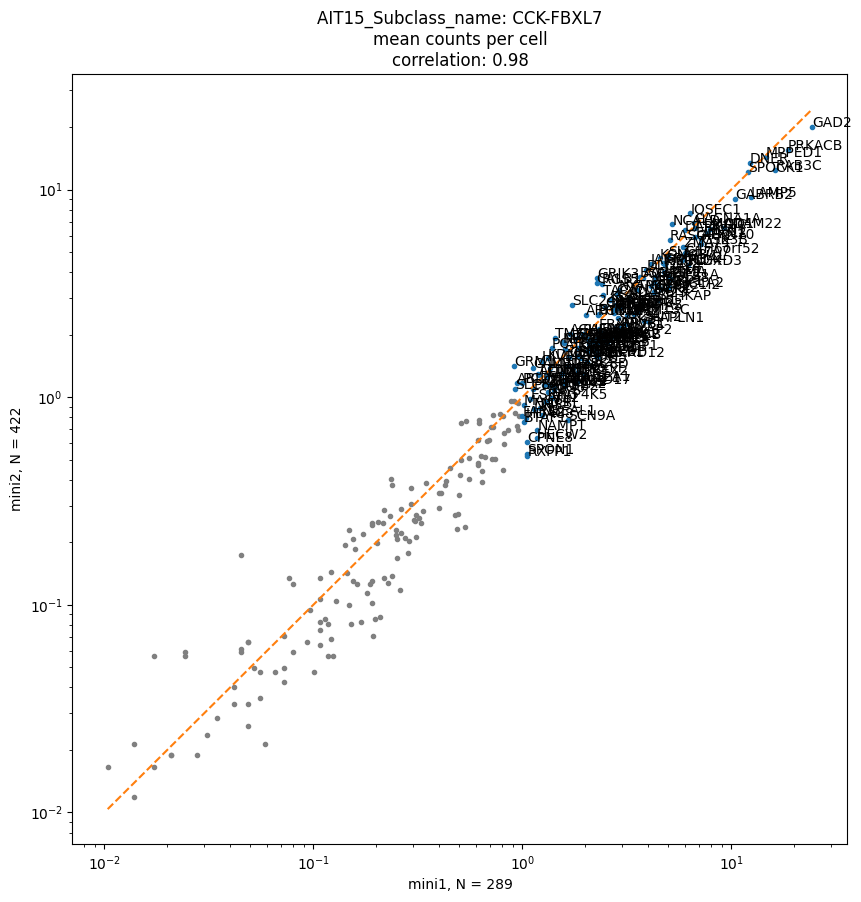

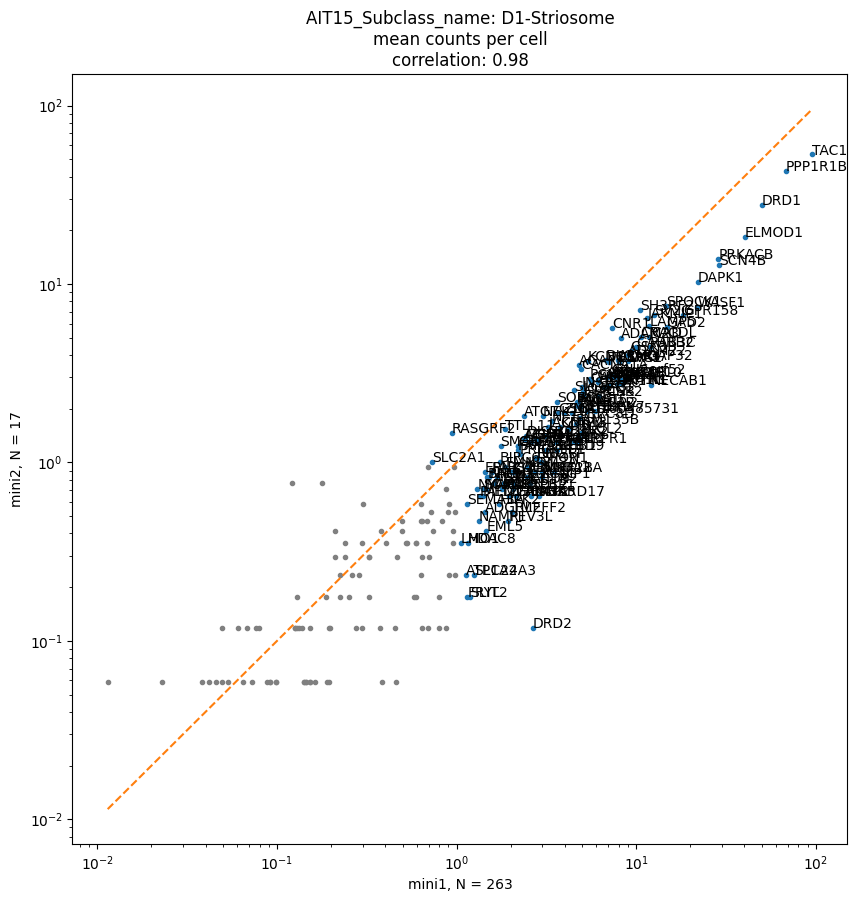

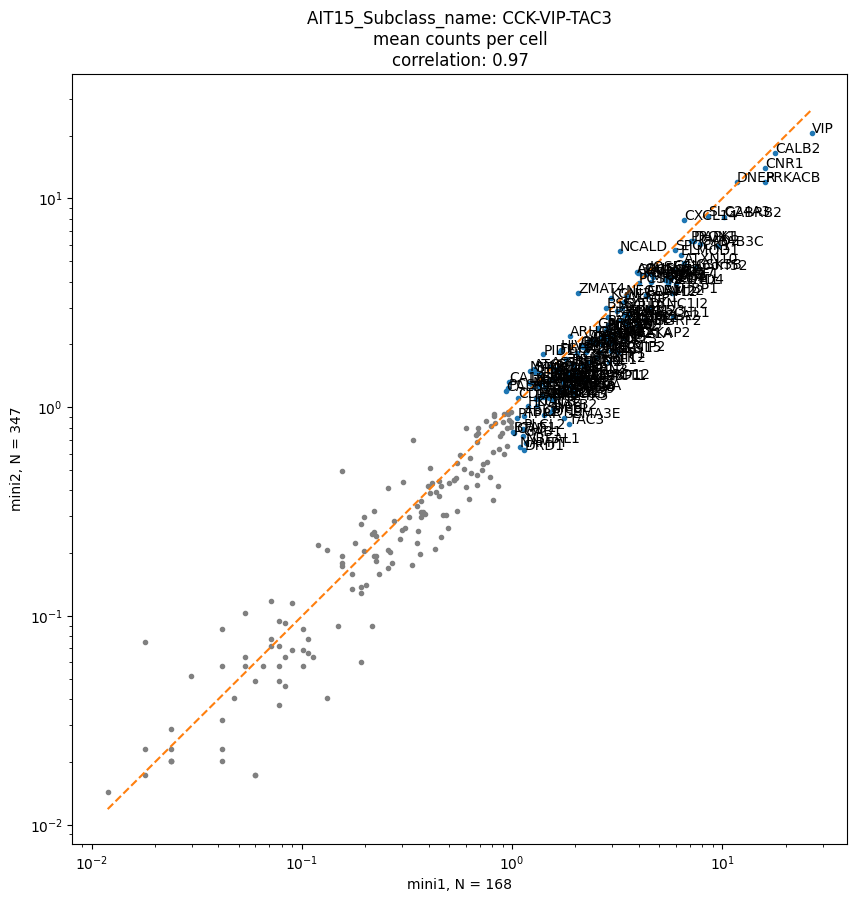

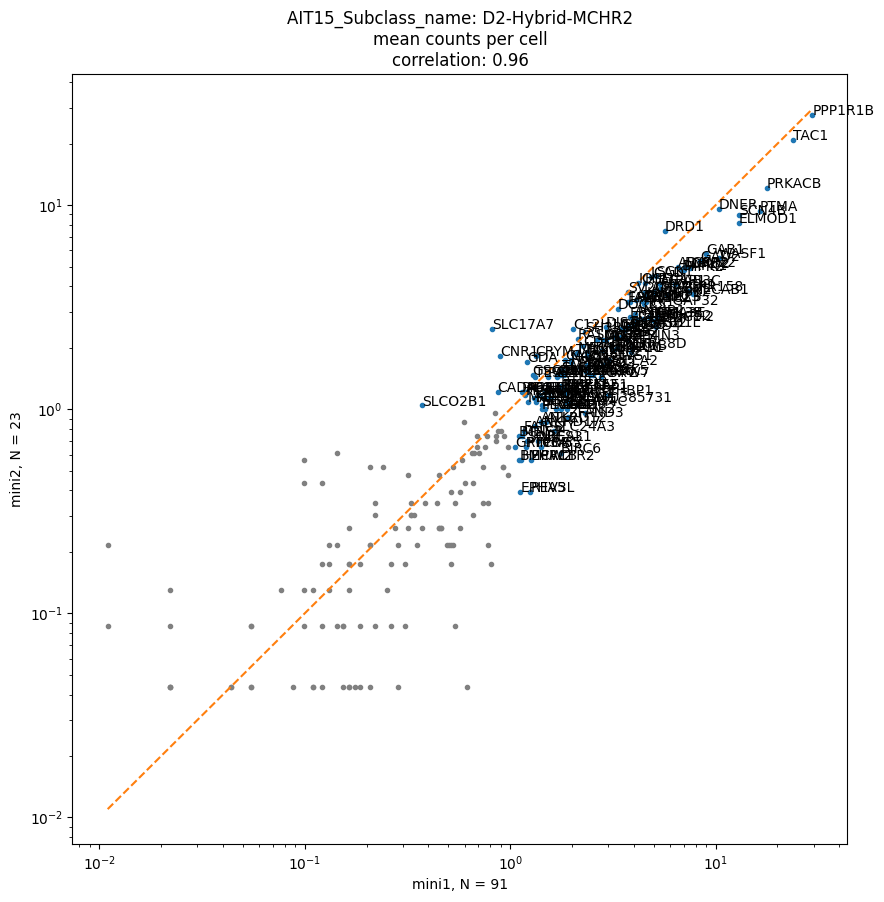

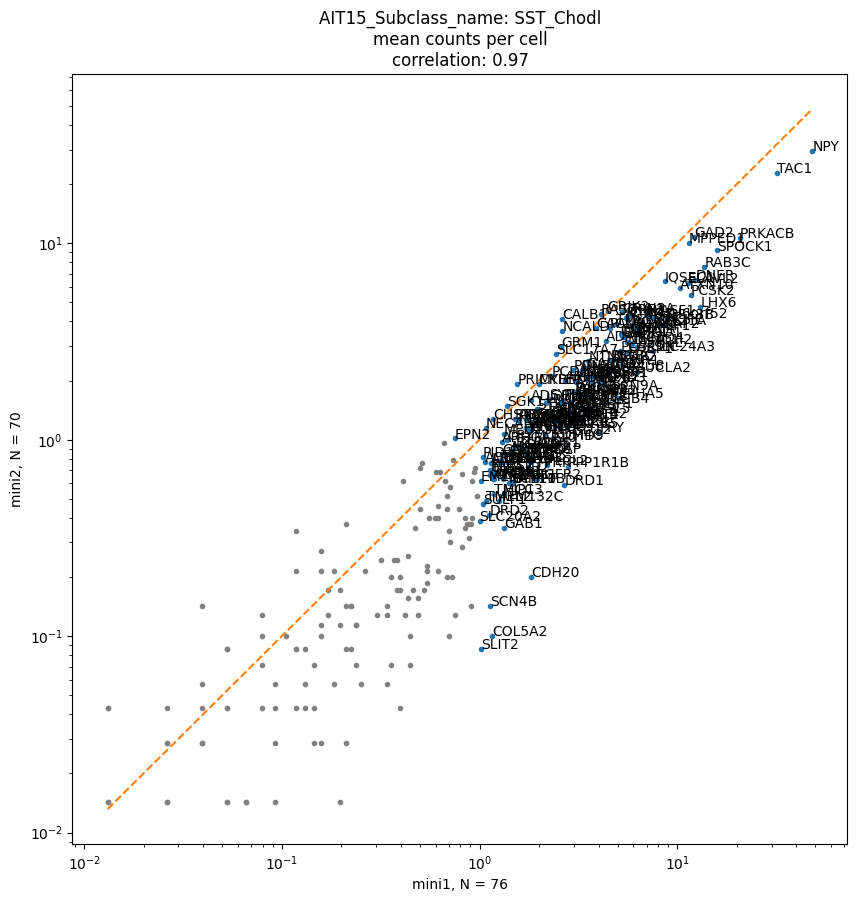

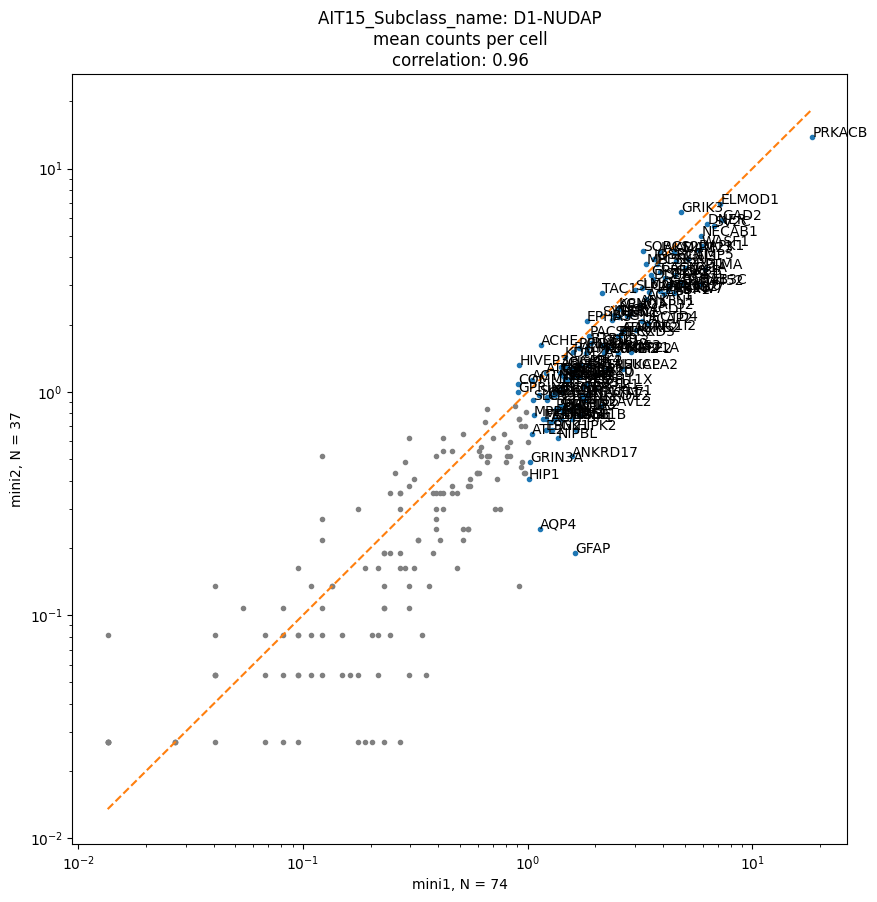

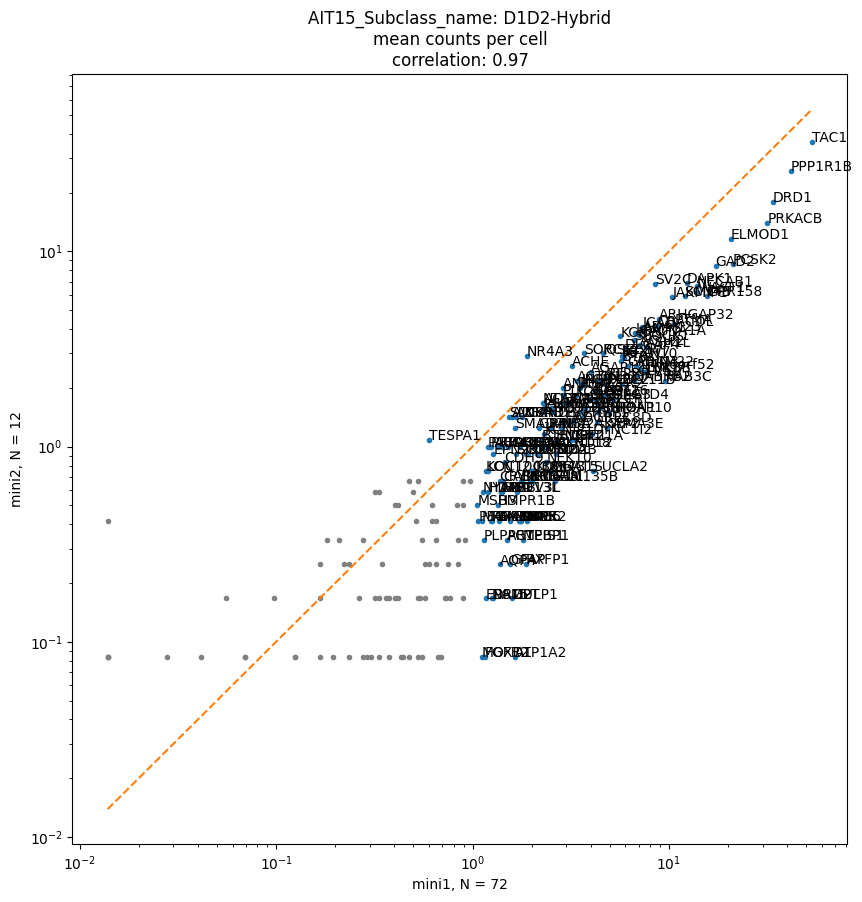

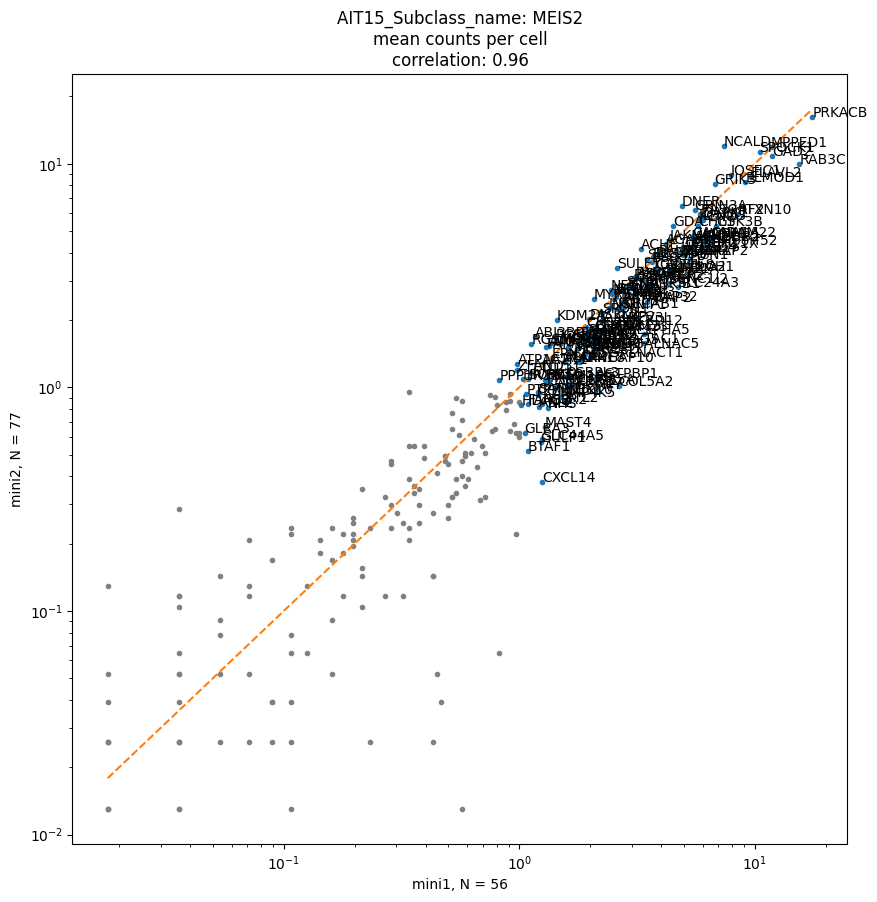

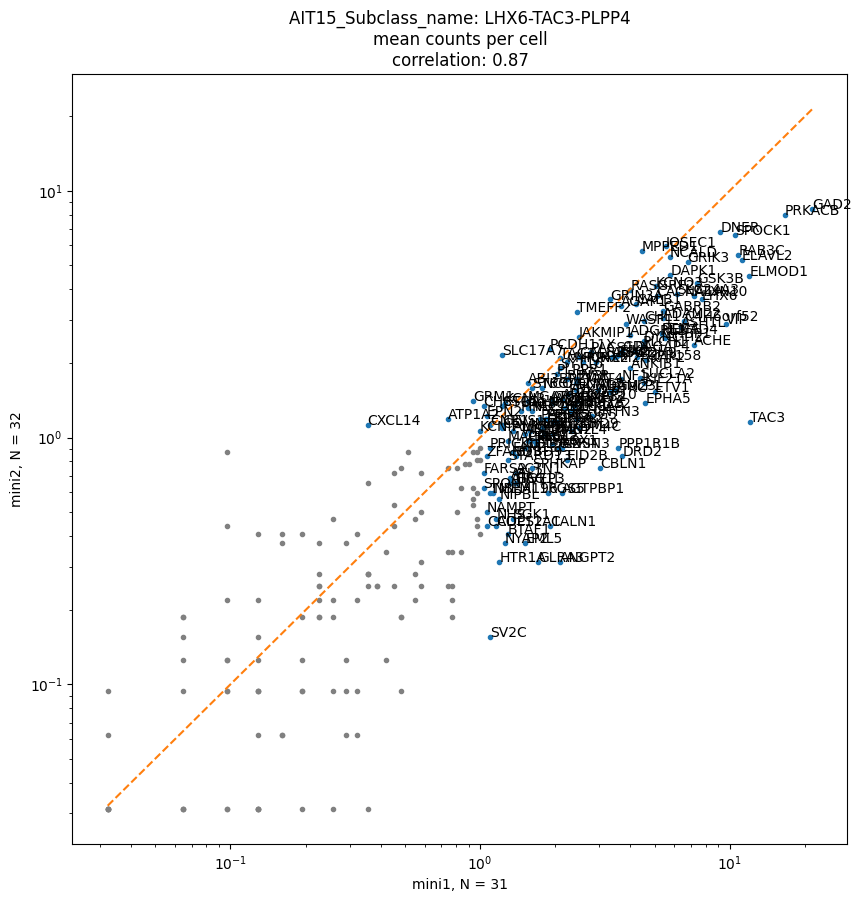

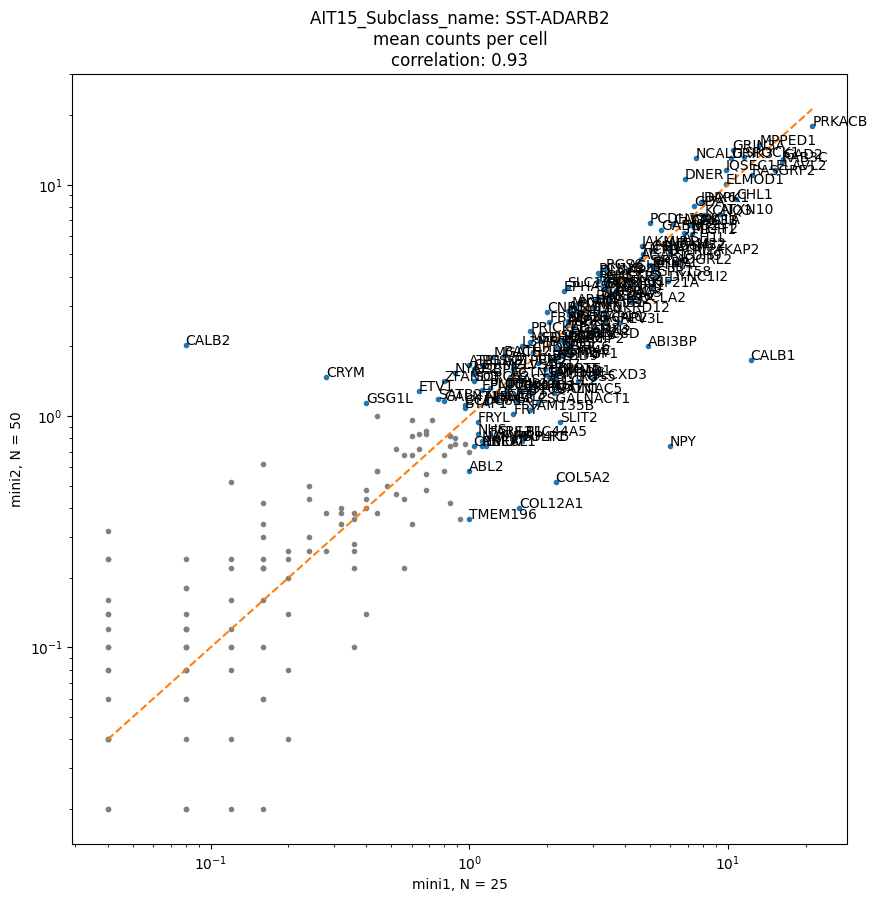

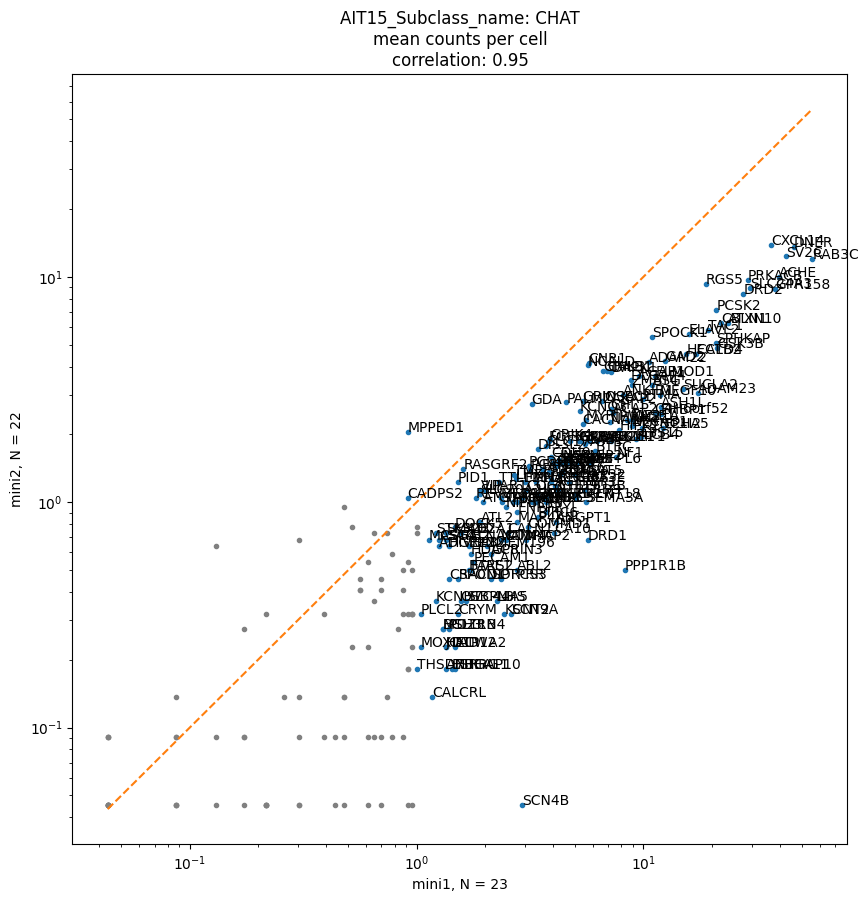

In [45]:
sc.spatial_compare(min_mean_expression=0.01, plot_stuff=True)

In [81]:
sc.de_novo_cluster()

/home/brianl/projects/spatial_compare/spatial_compare.py:479: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


True

/home/brianl/projects/spatial_compare/spatial_compare.py:210: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  gene_ratio_dfs[category_value] = pd.DataFrame(means_1/means_0,columns=[self.data_names[1]+" / "+self.data_names[0]+" ratio"], index = shared_genes)


dict_keys(['matched_leiden_cluster_0', 'matched_leiden_cluster_1', 'matched_leiden_cluster_2', 'matched_leiden_cluster_3', 'matched_leiden_cluster_4', 'matched_leiden_cluster_5', 'matched_leiden_cluster_6', 'matched_leiden_cluster_7', 'matched_leiden_cluster_8', 'matched_leiden_cluster_9', 'matched_leiden_cluster_10', 'matched_leiden_cluster_11', 'matched_leiden_cluster_12', 'matched_leiden_cluster_13', 'matched_leiden_cluster_14', 'matched_leiden_cluster_16', 'matched_leiden_cluster_17', 'matched_leiden_cluster_19', 'matched_leiden_cluster_20'])


True

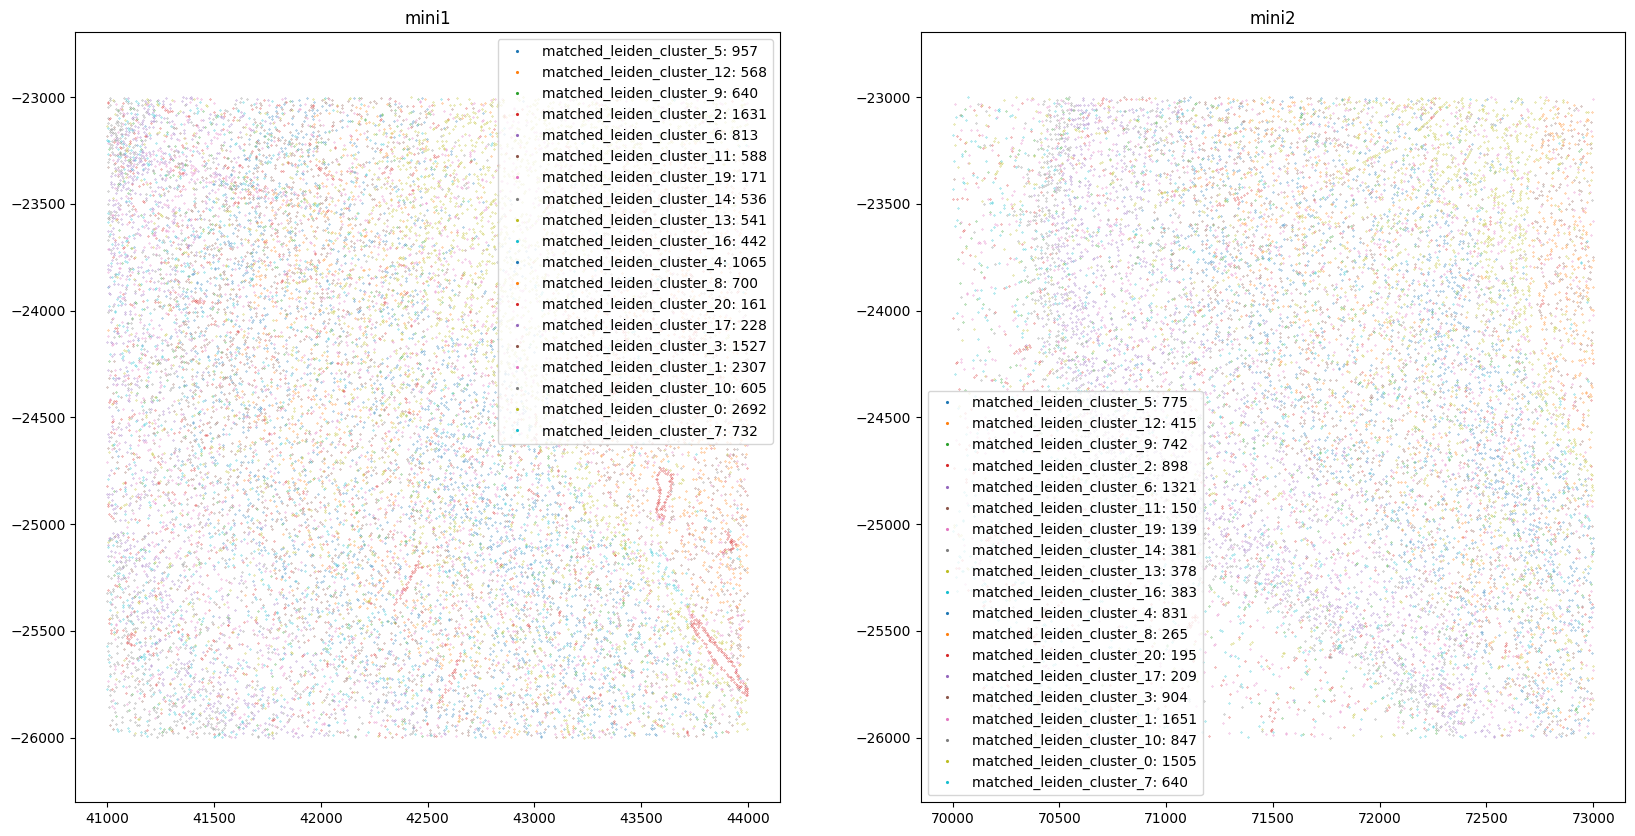

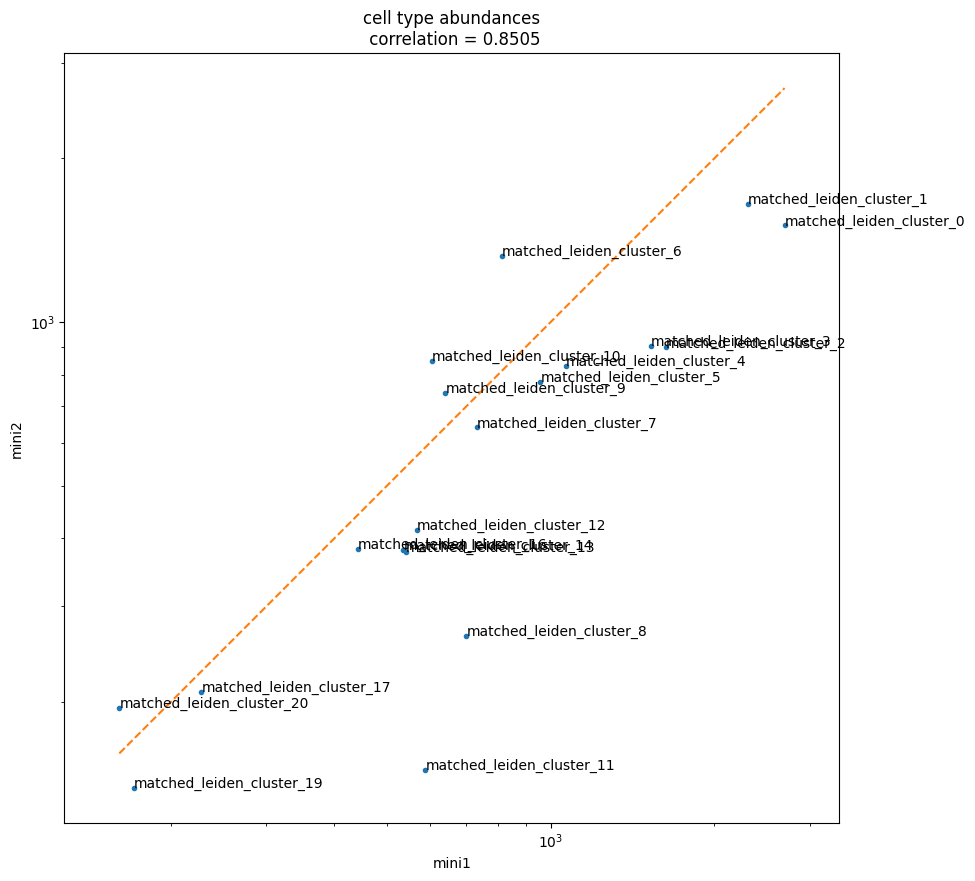

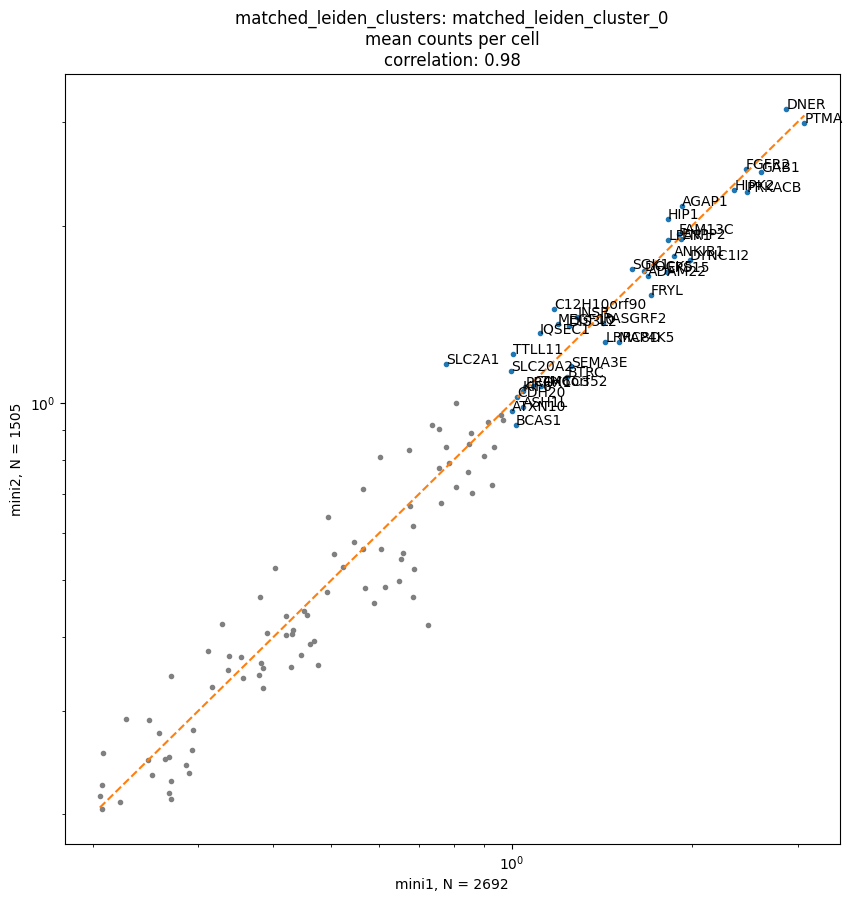

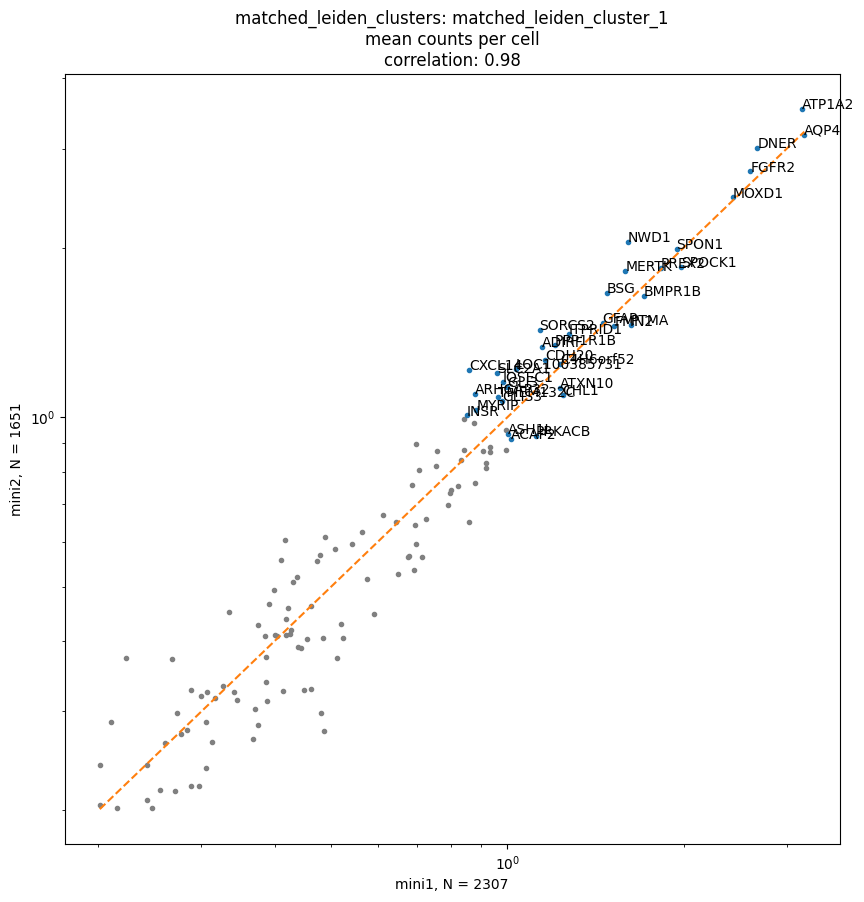

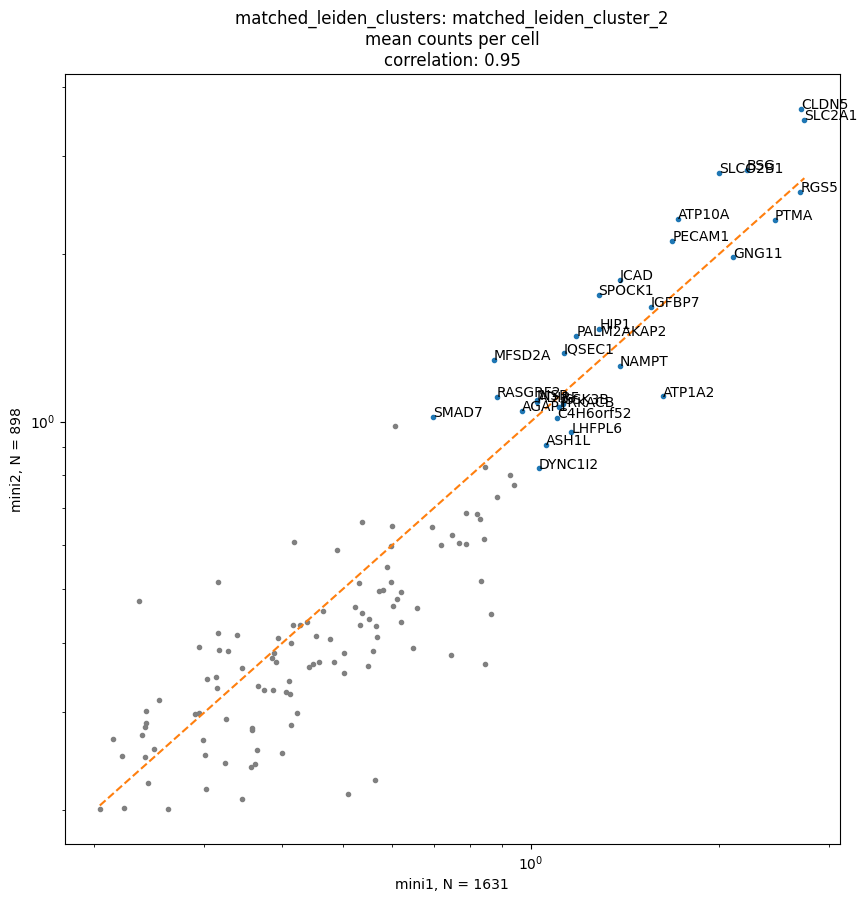

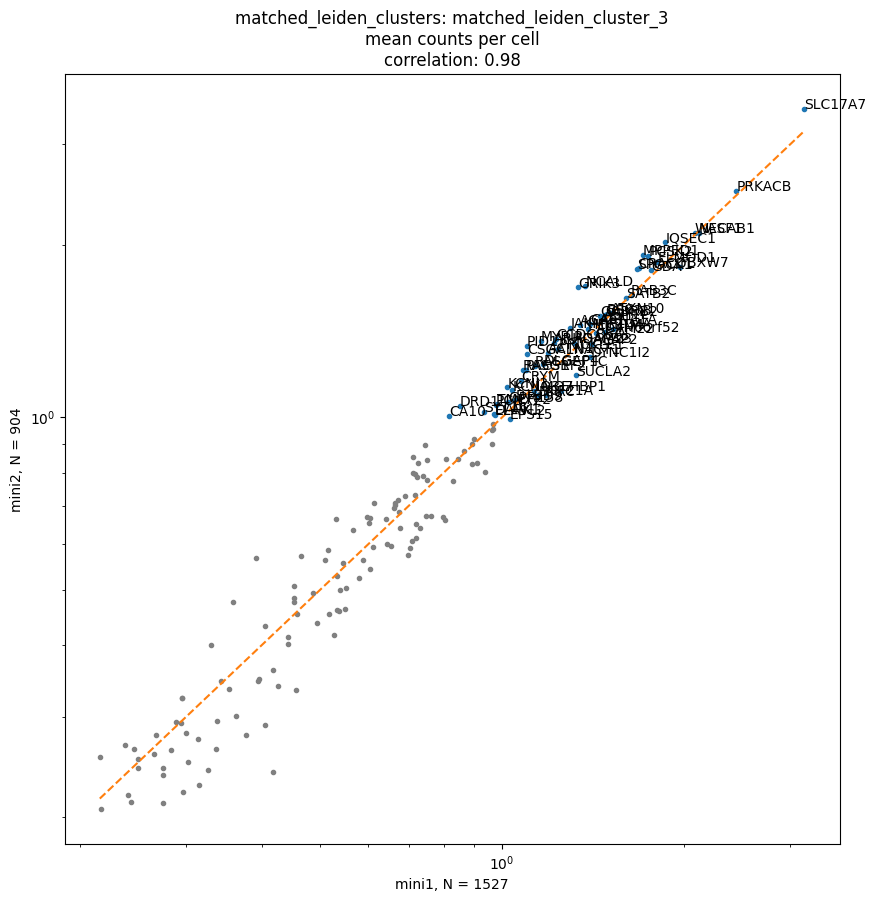

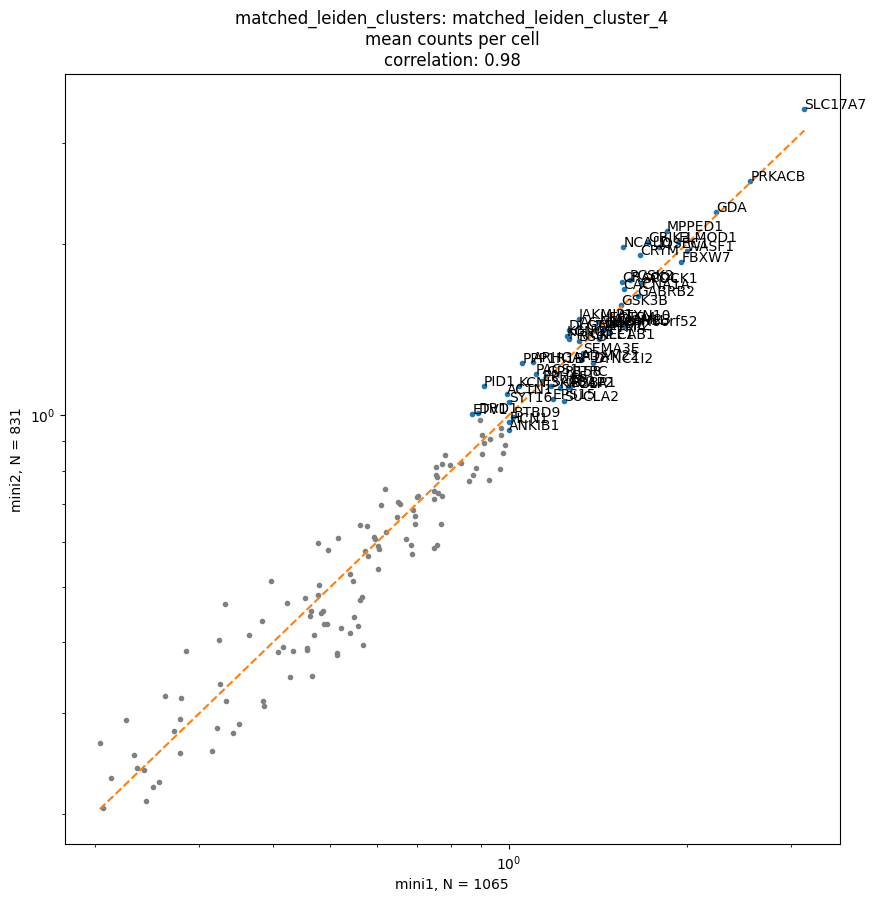

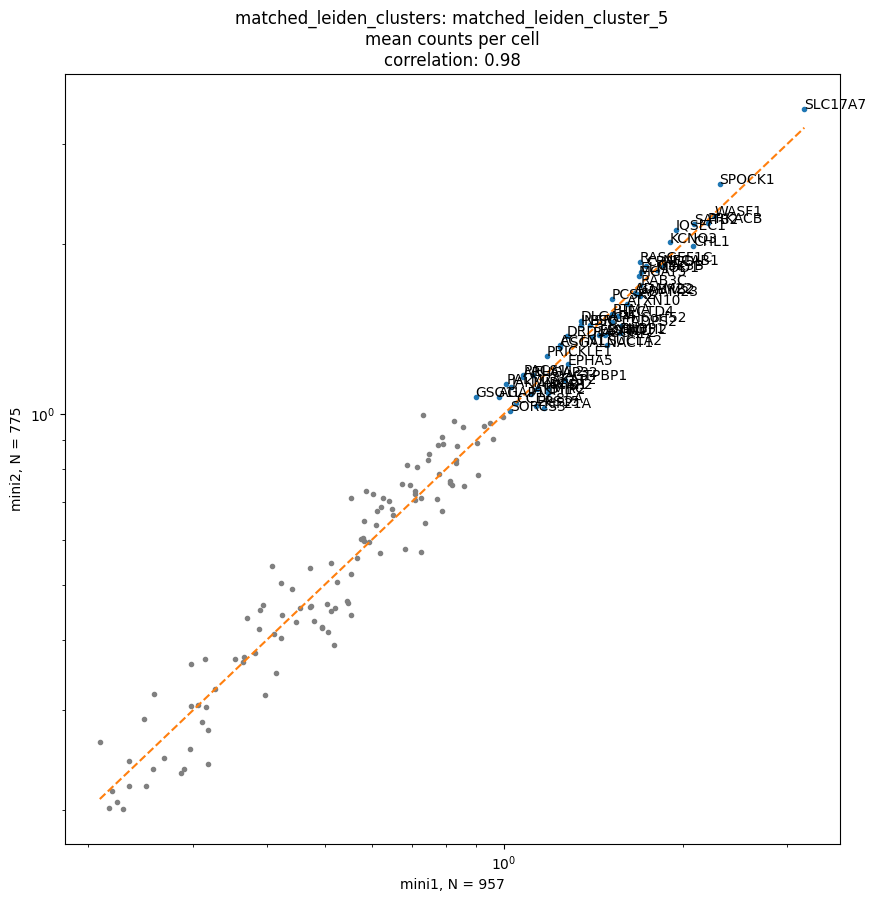

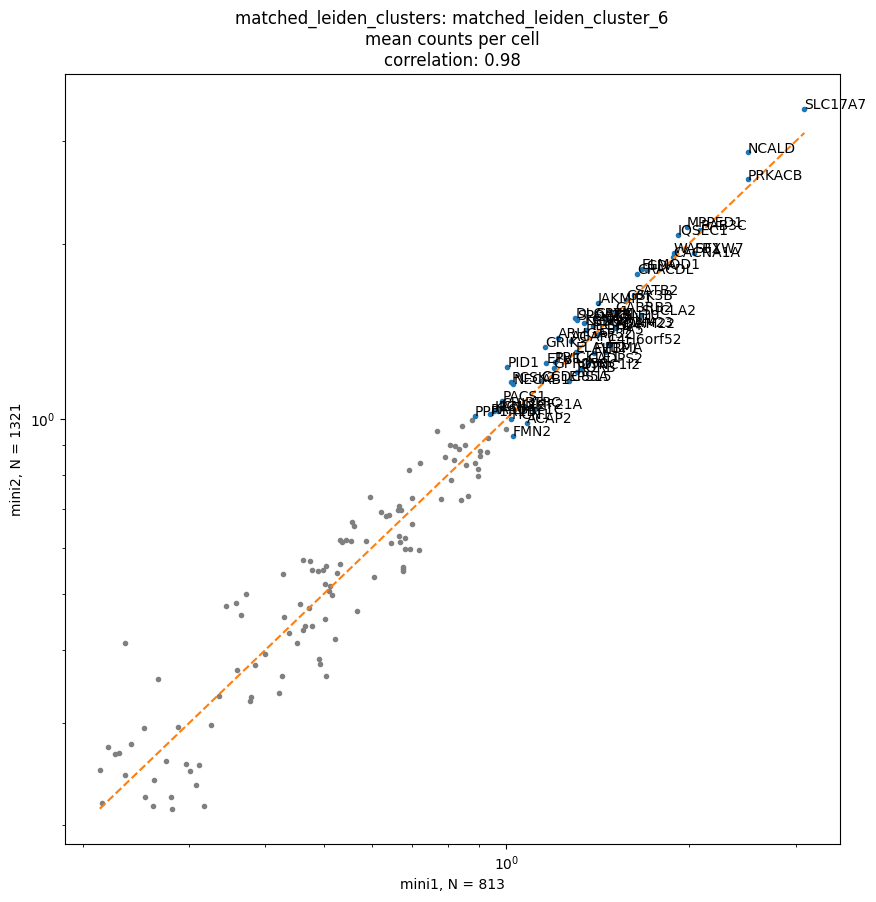

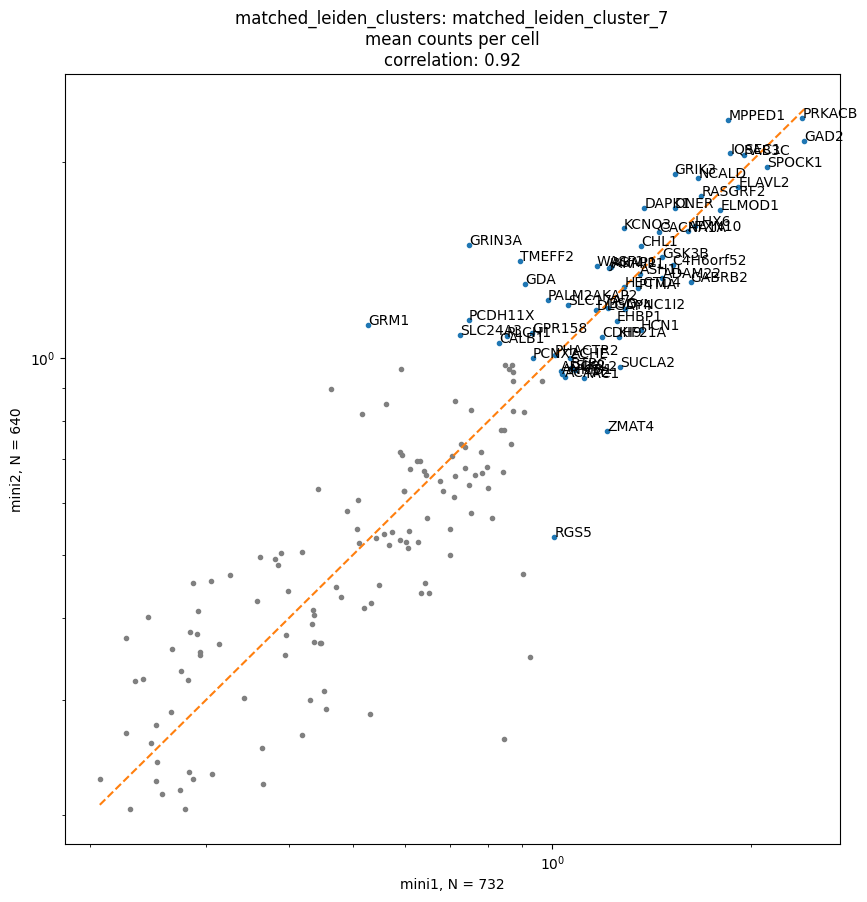

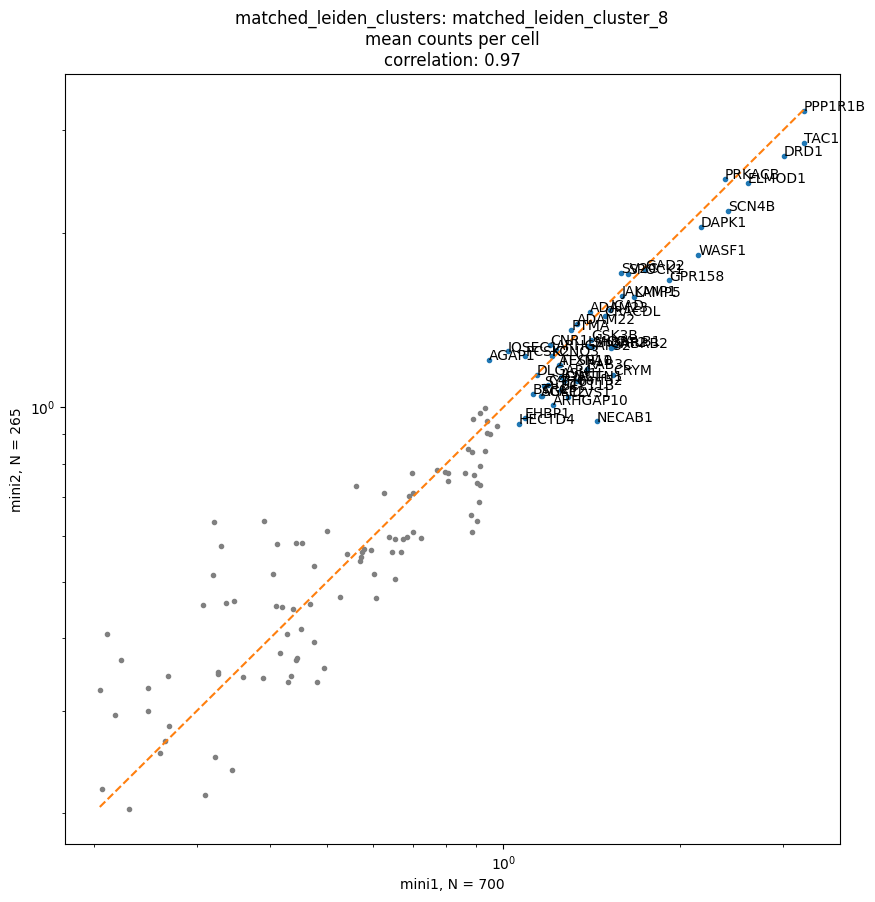

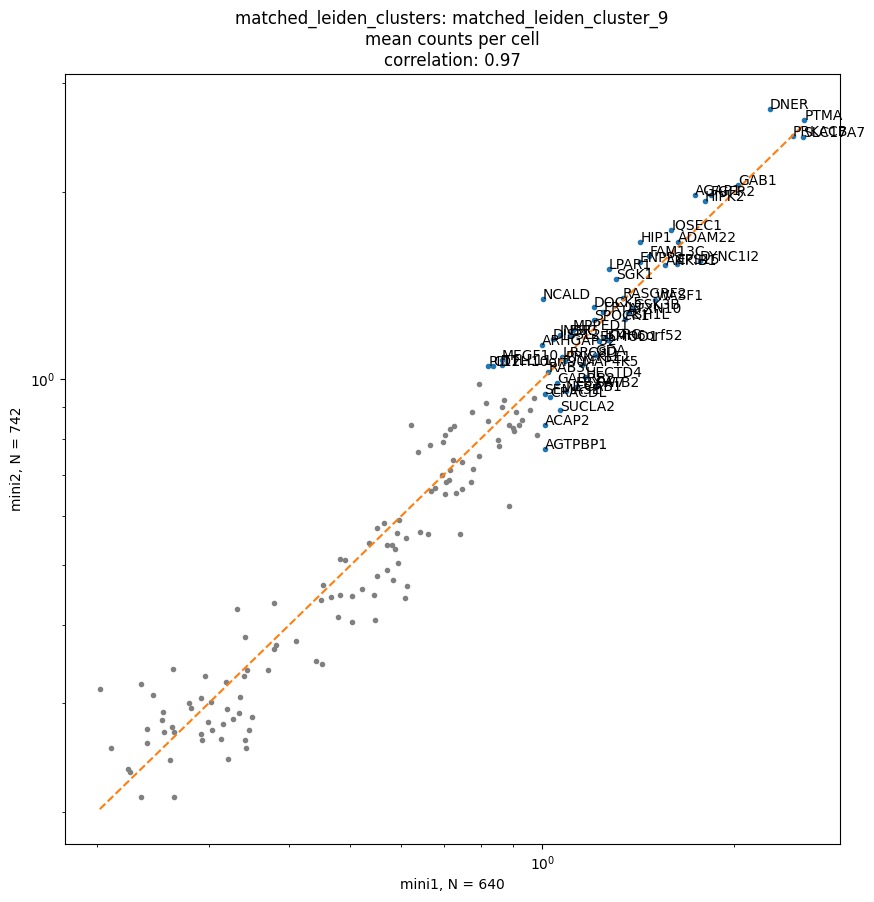

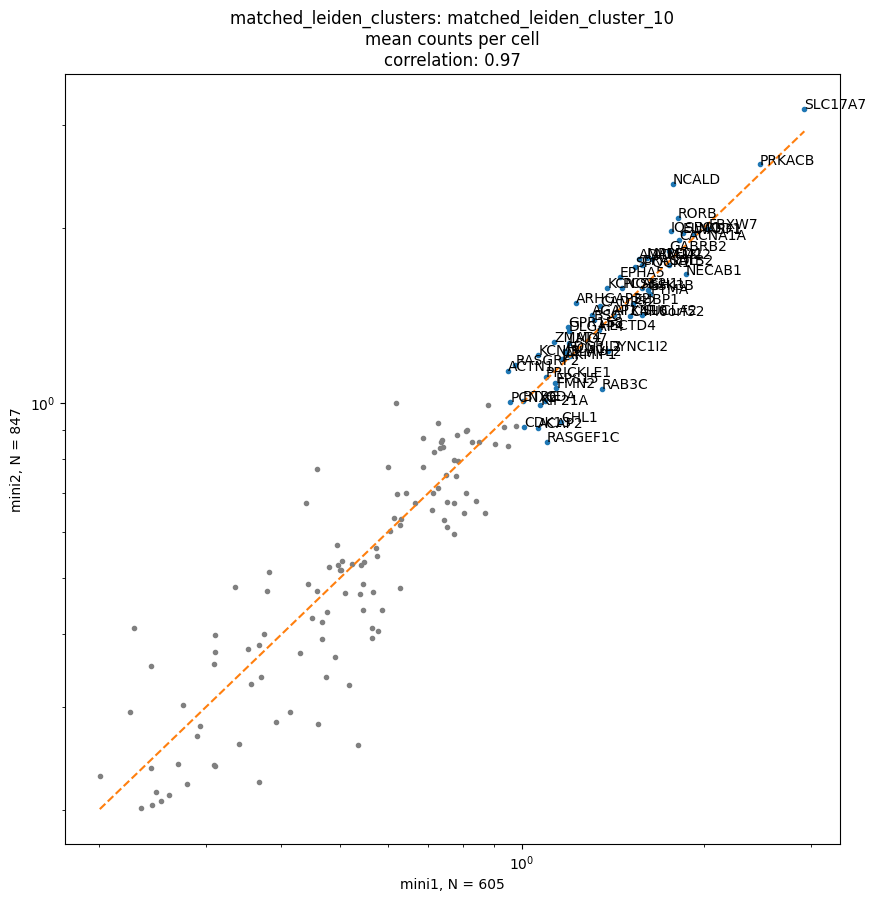

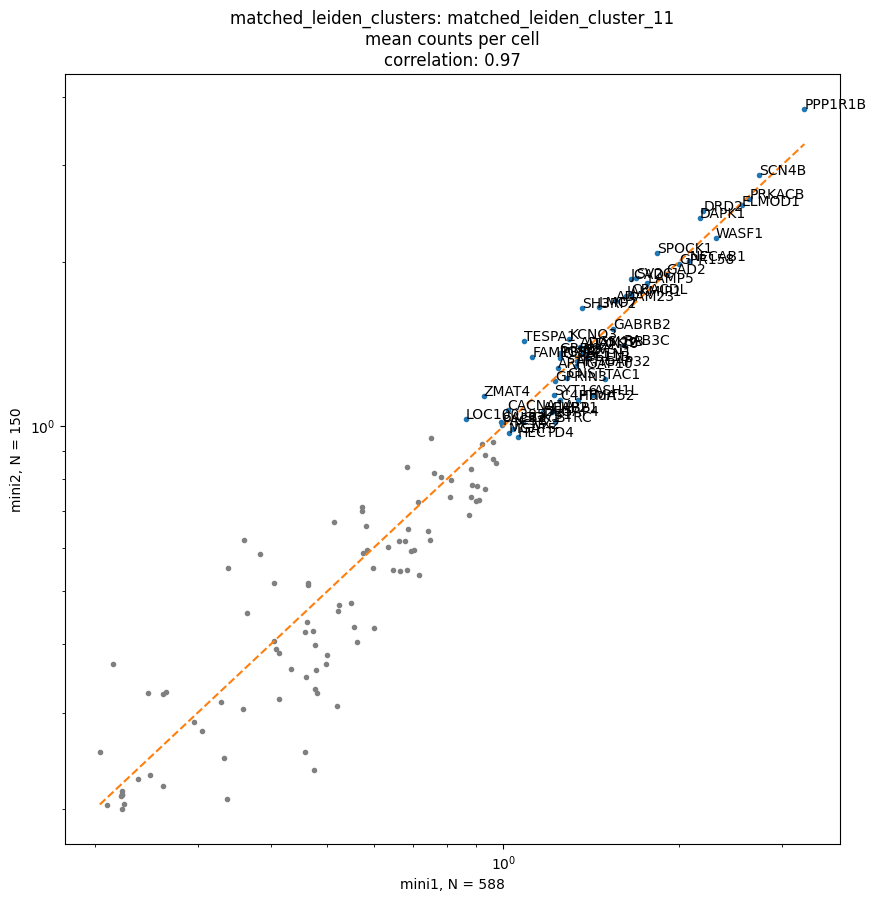

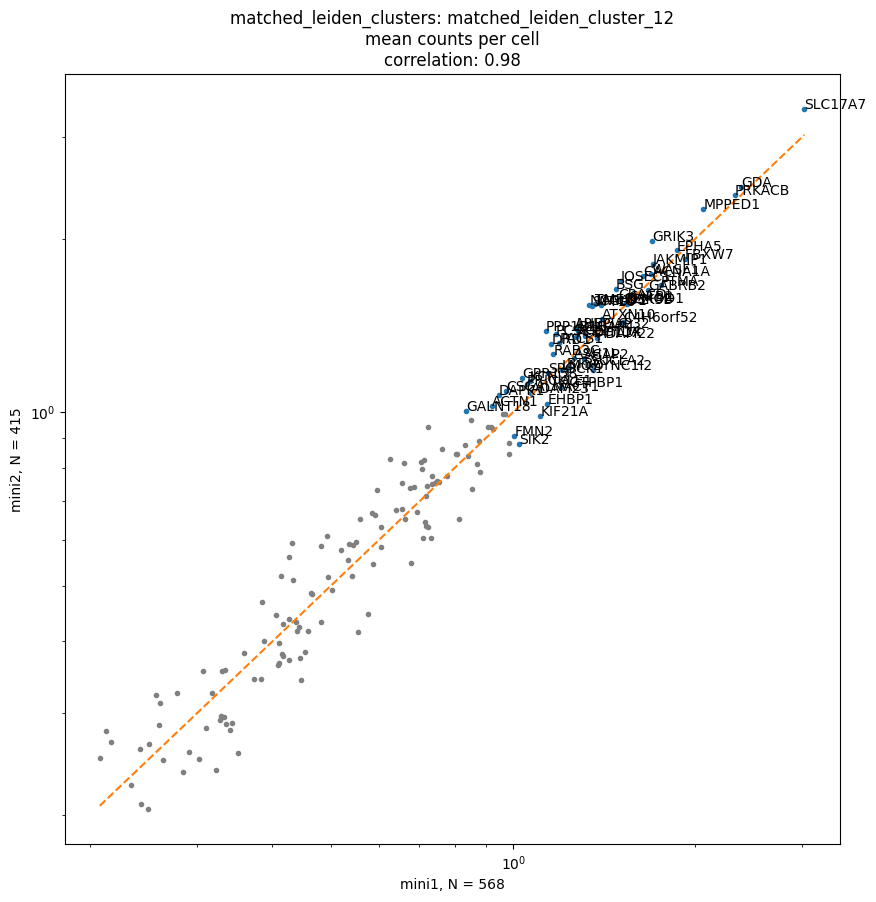

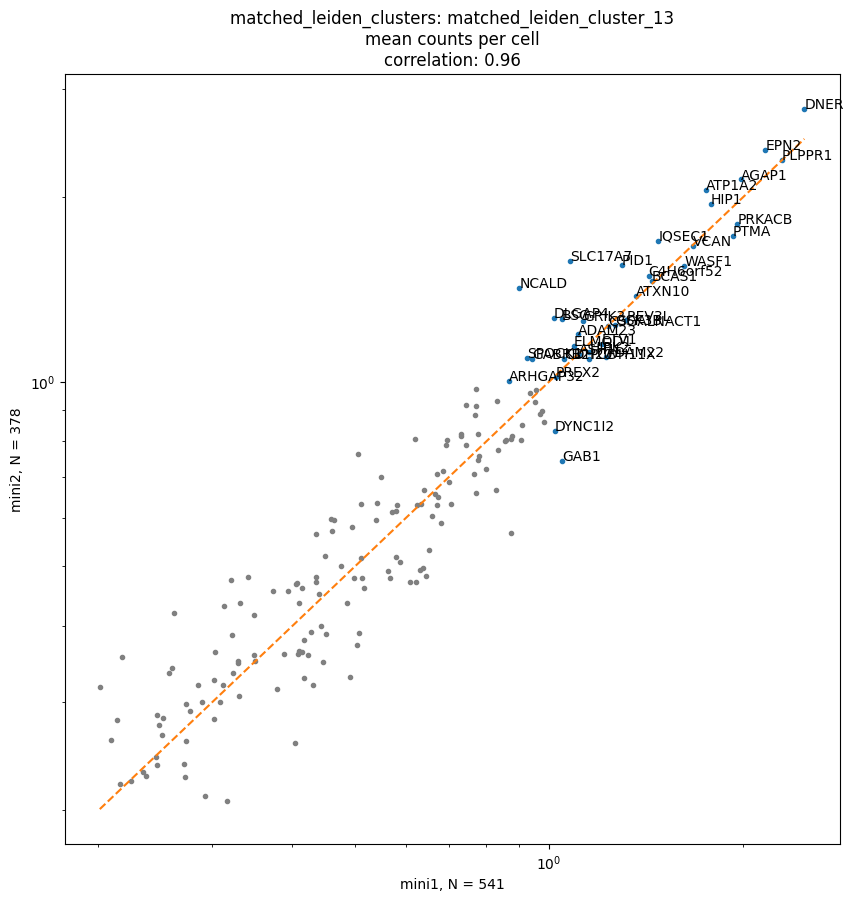

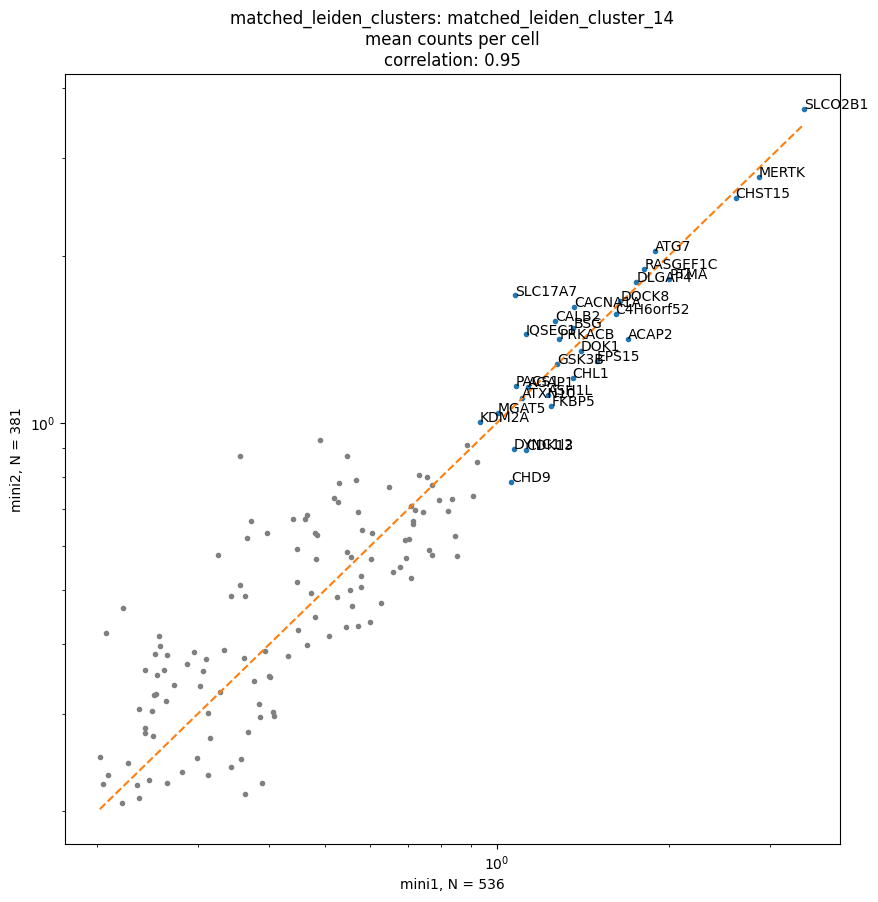

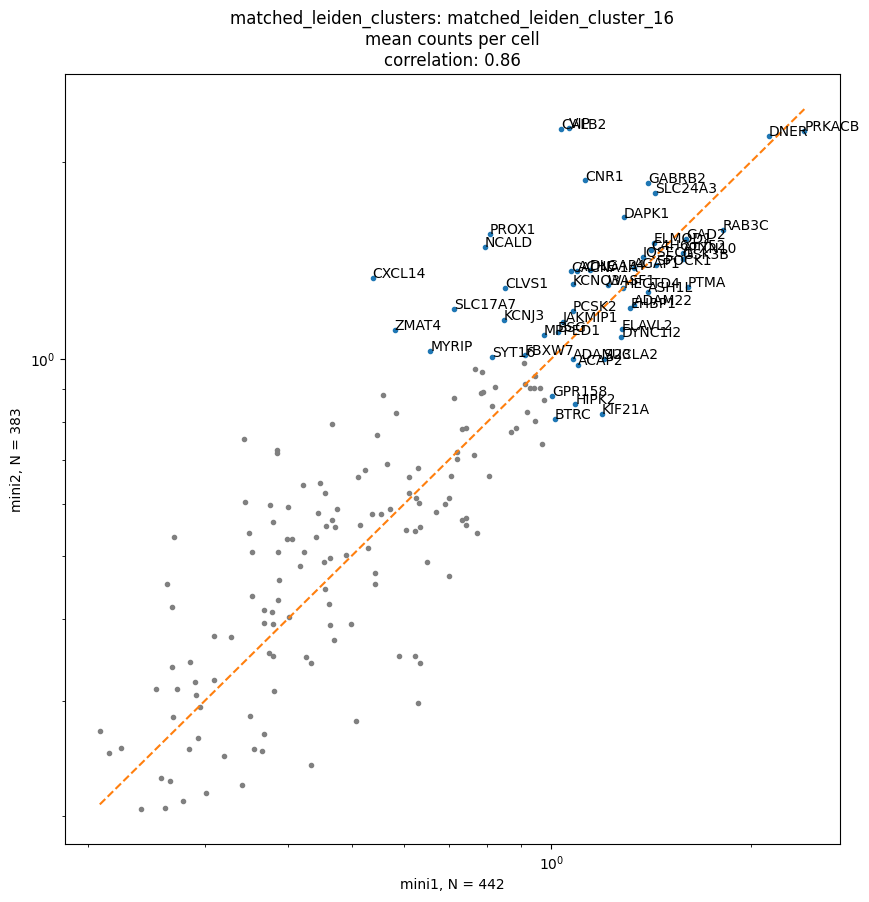

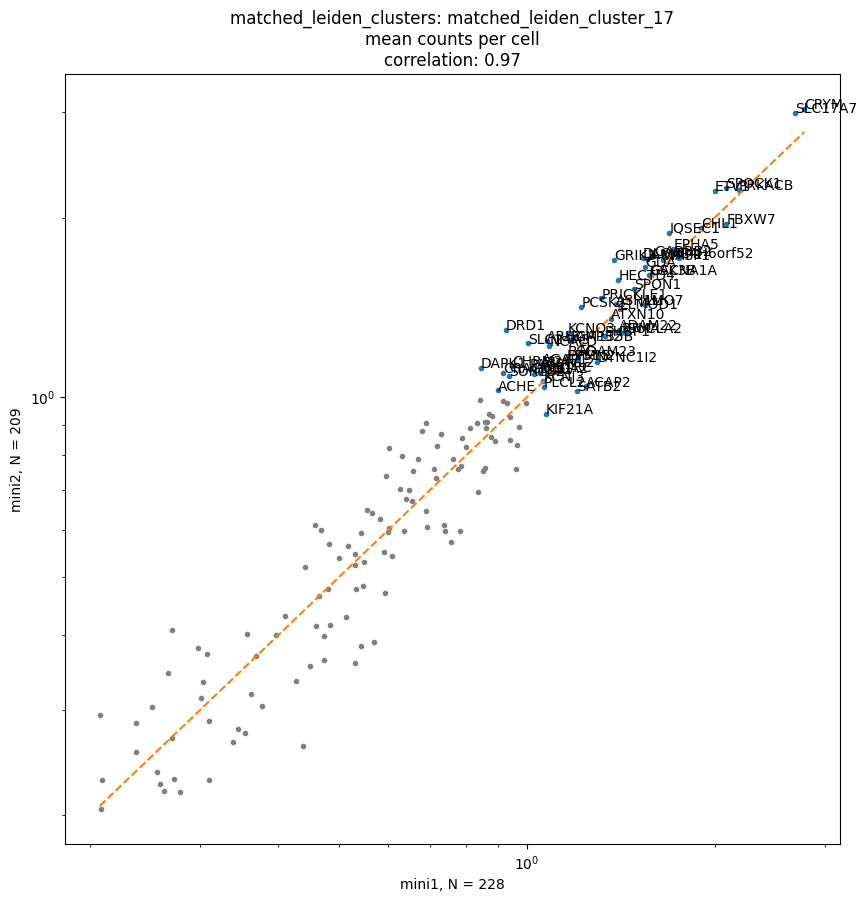

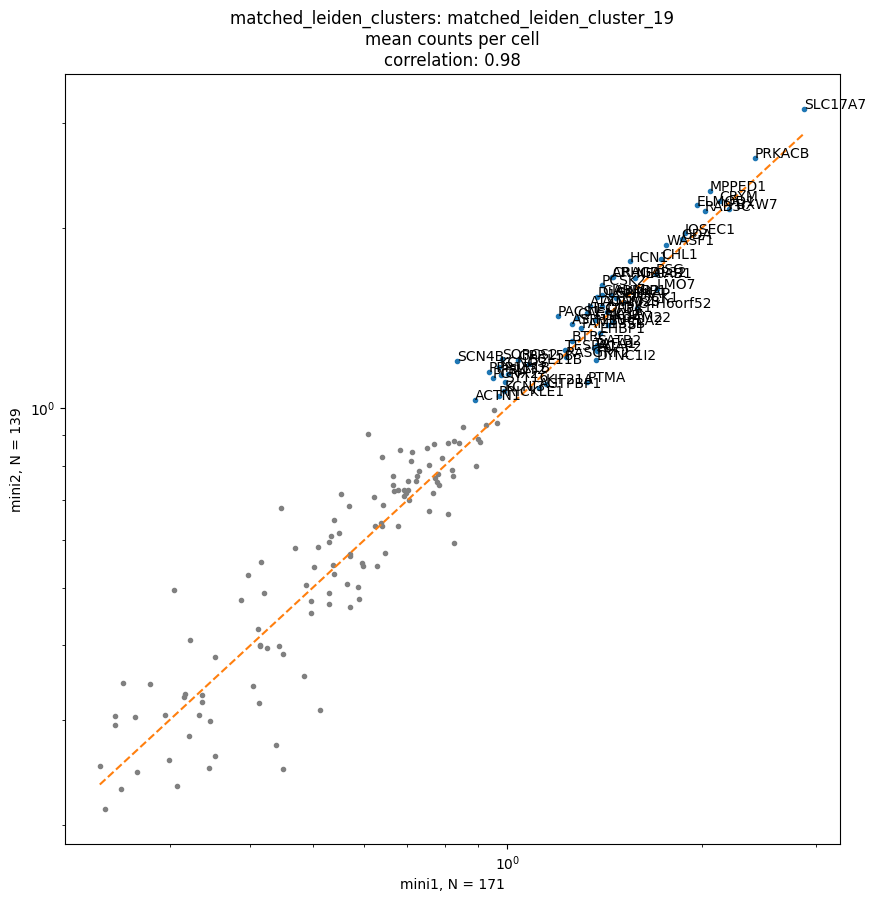

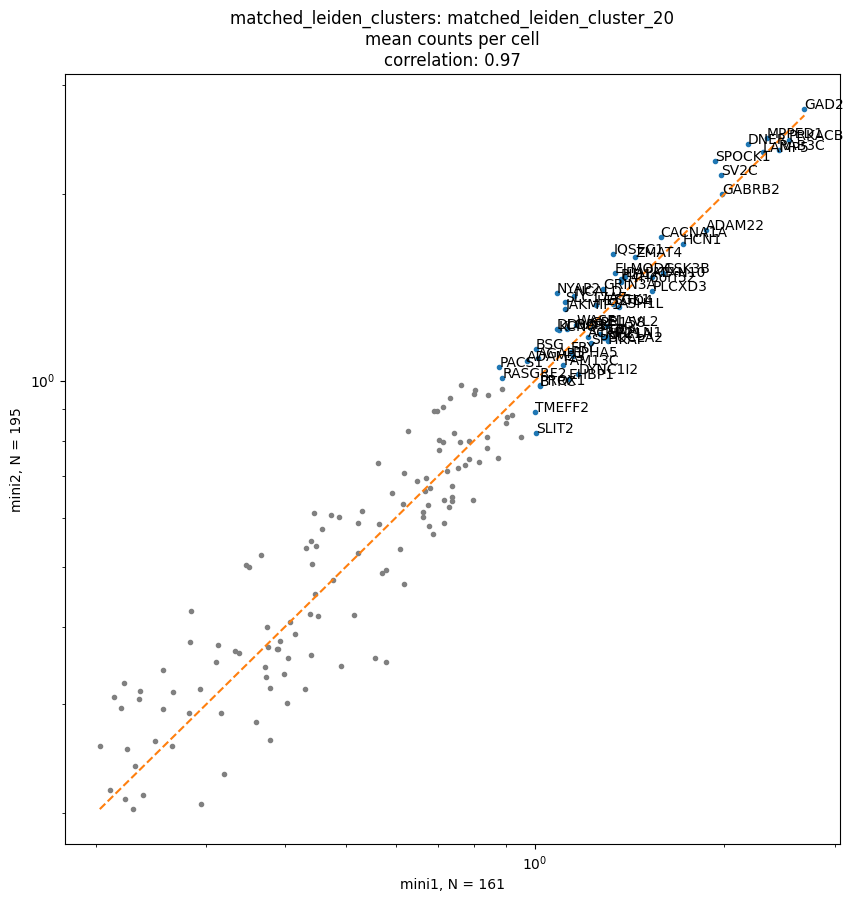

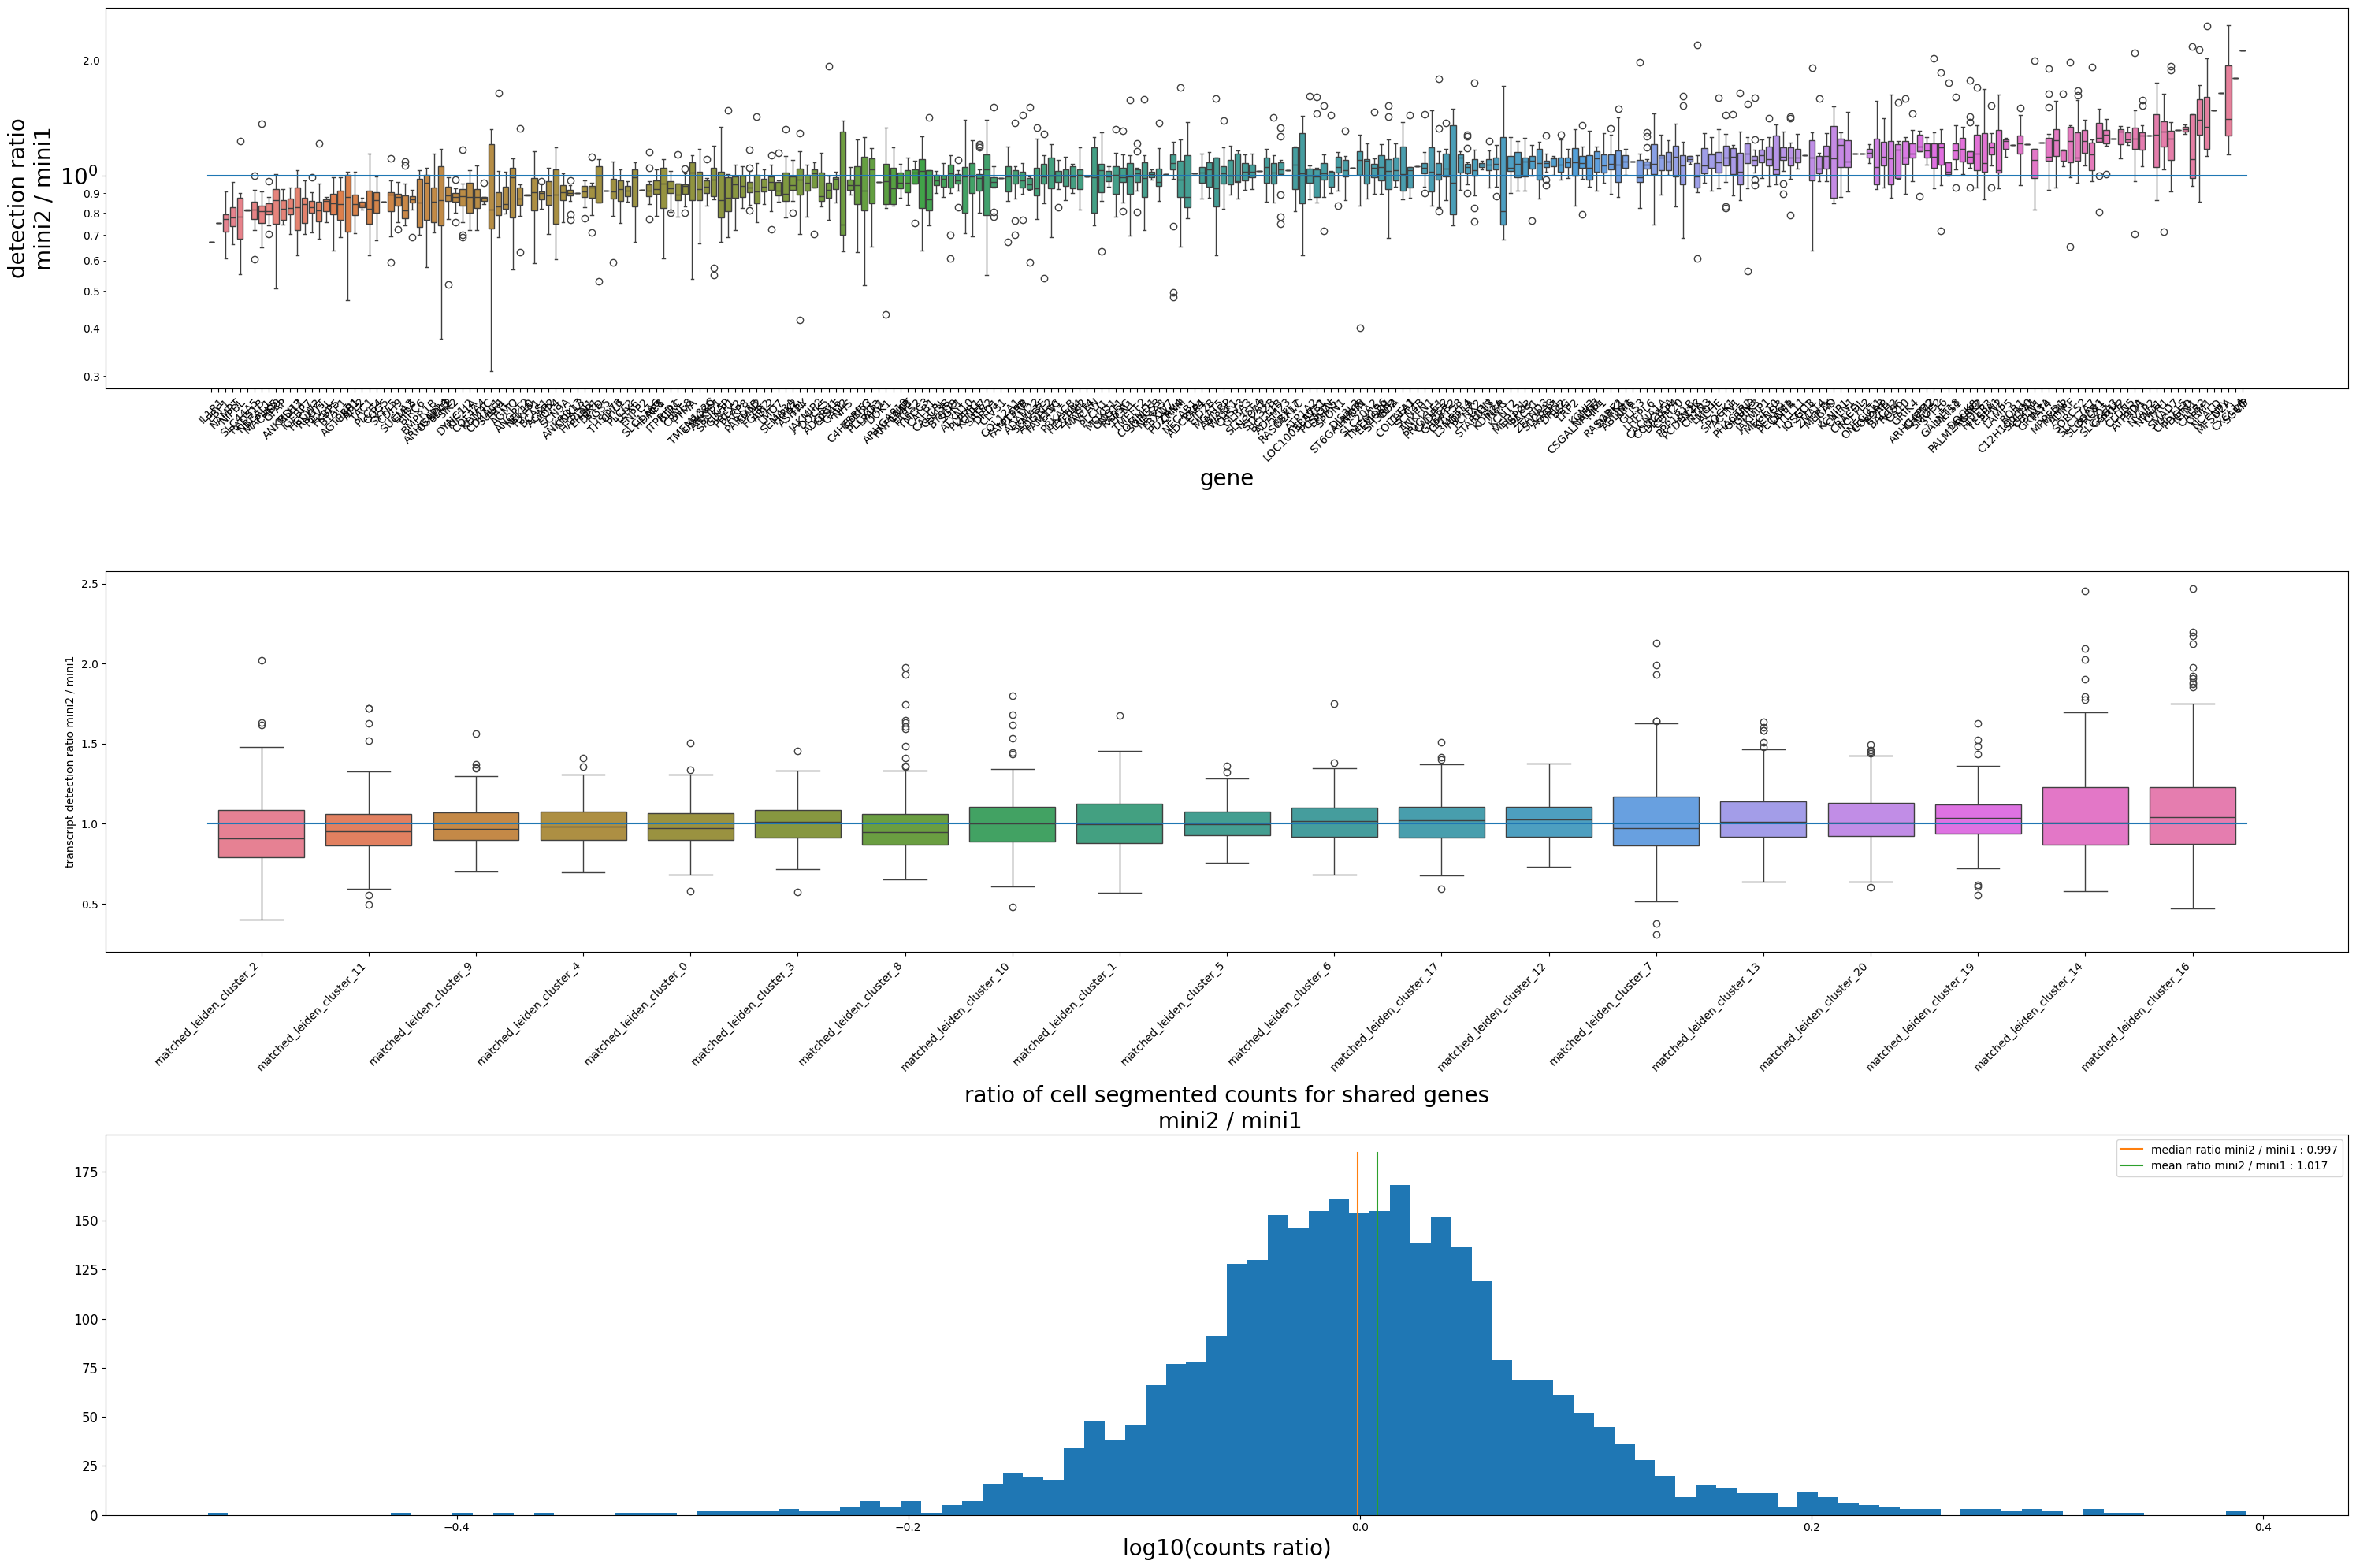

In [82]:
sc.run_and_plot()

In [ ]:
sc.run_and_plot()

297


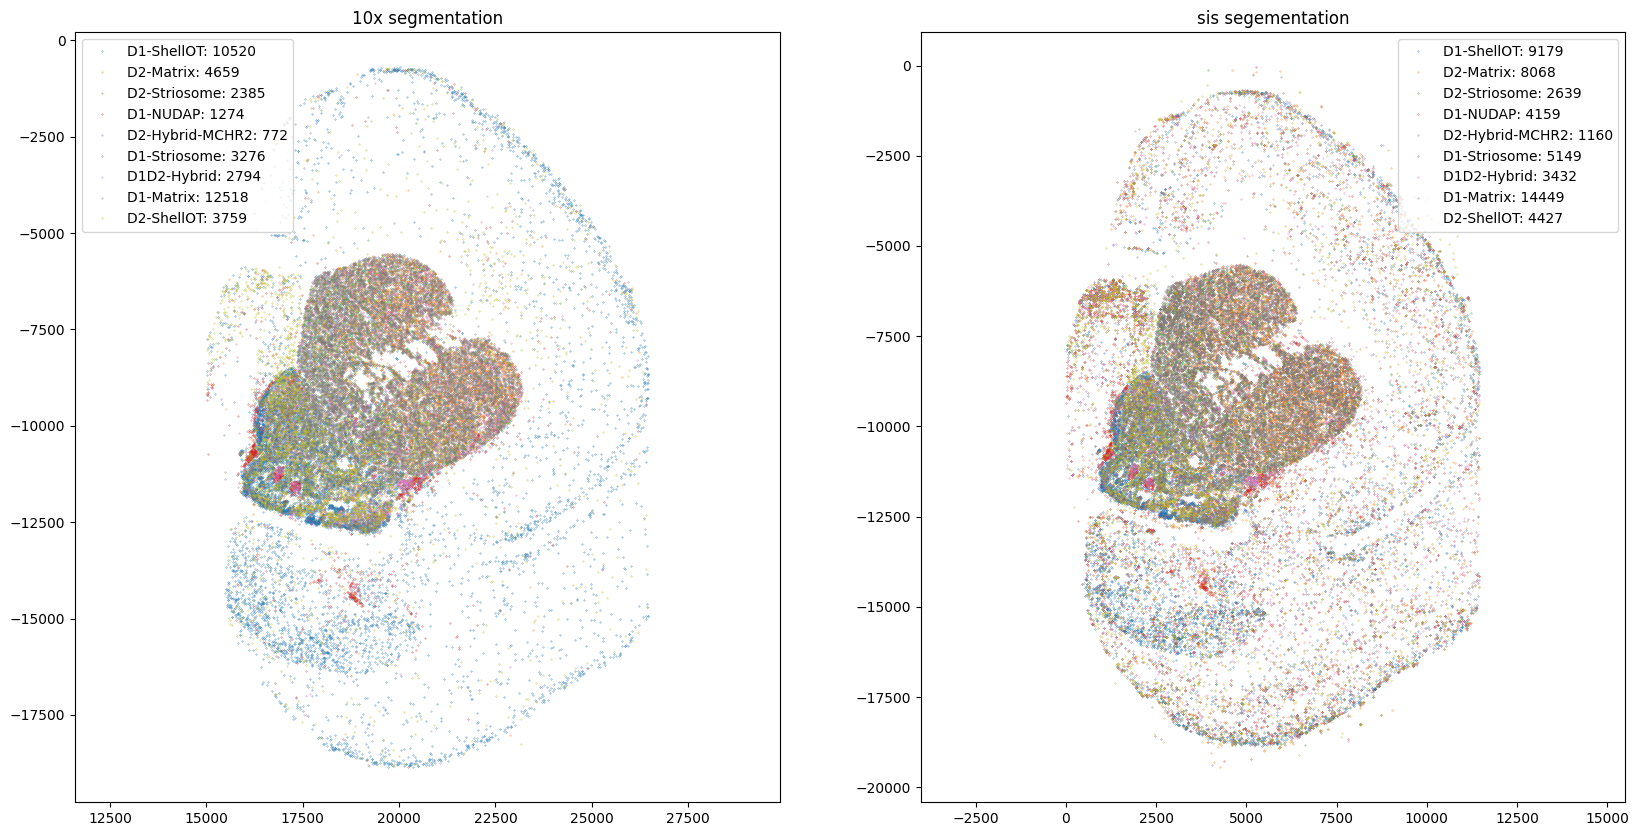

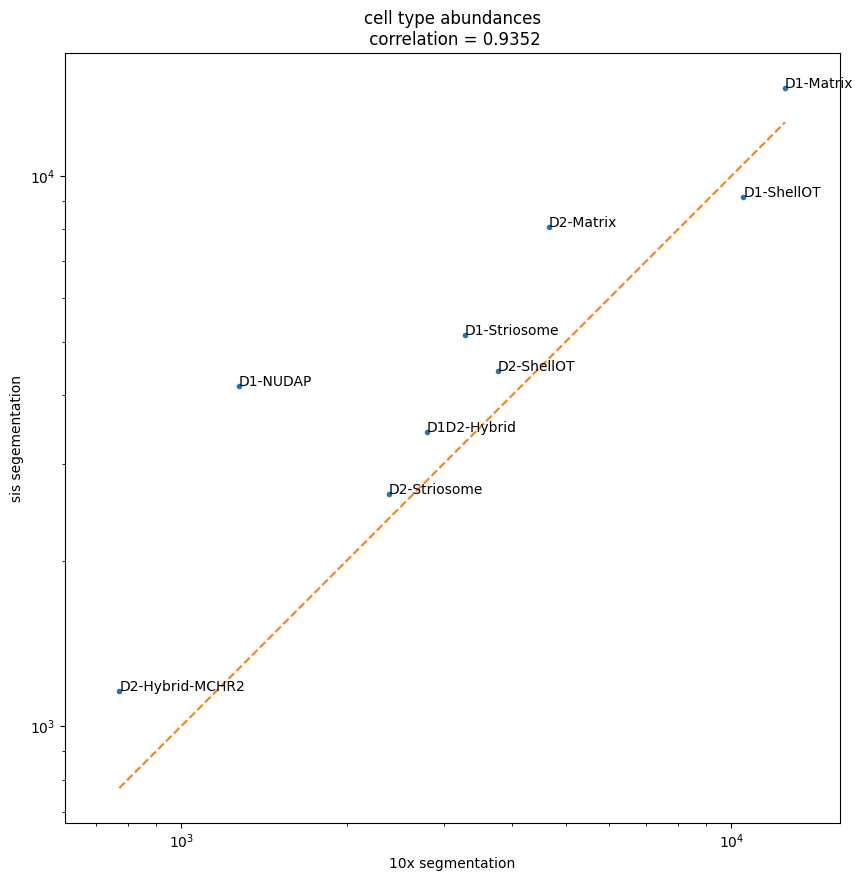

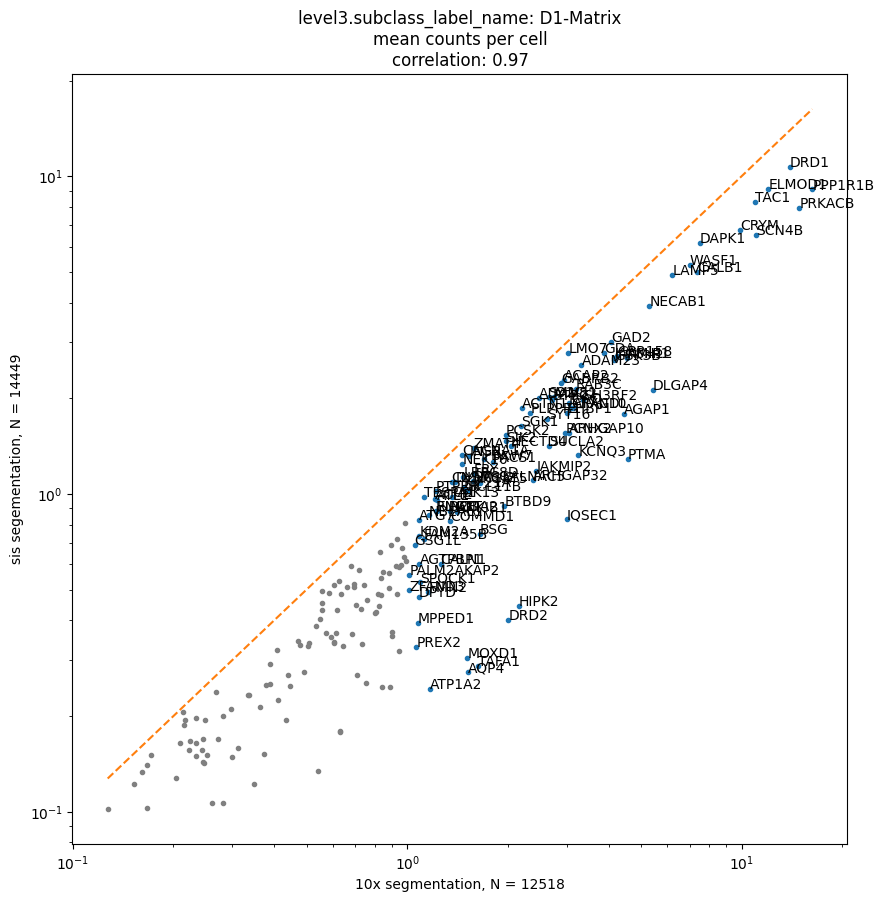

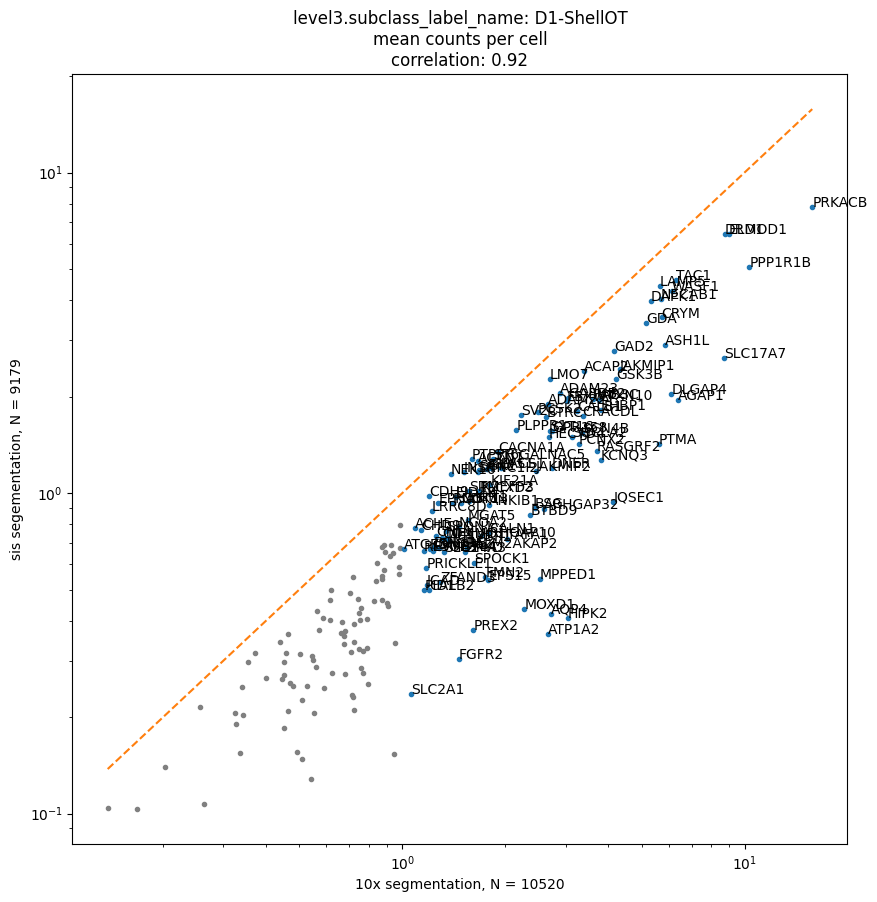

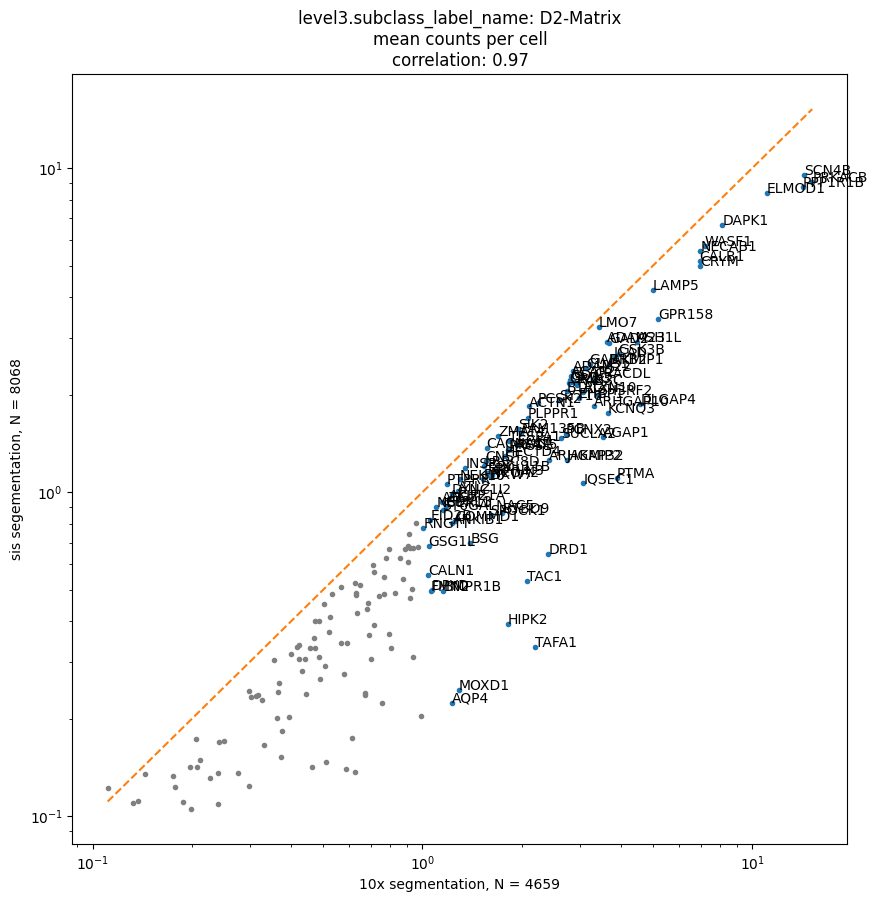

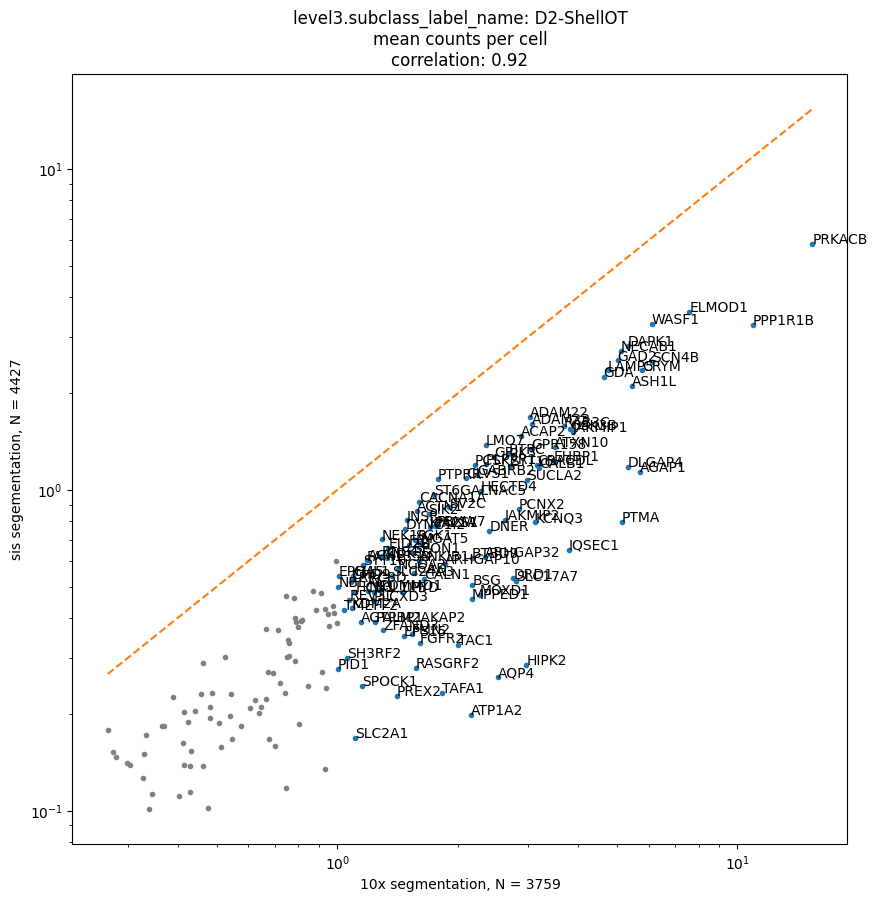

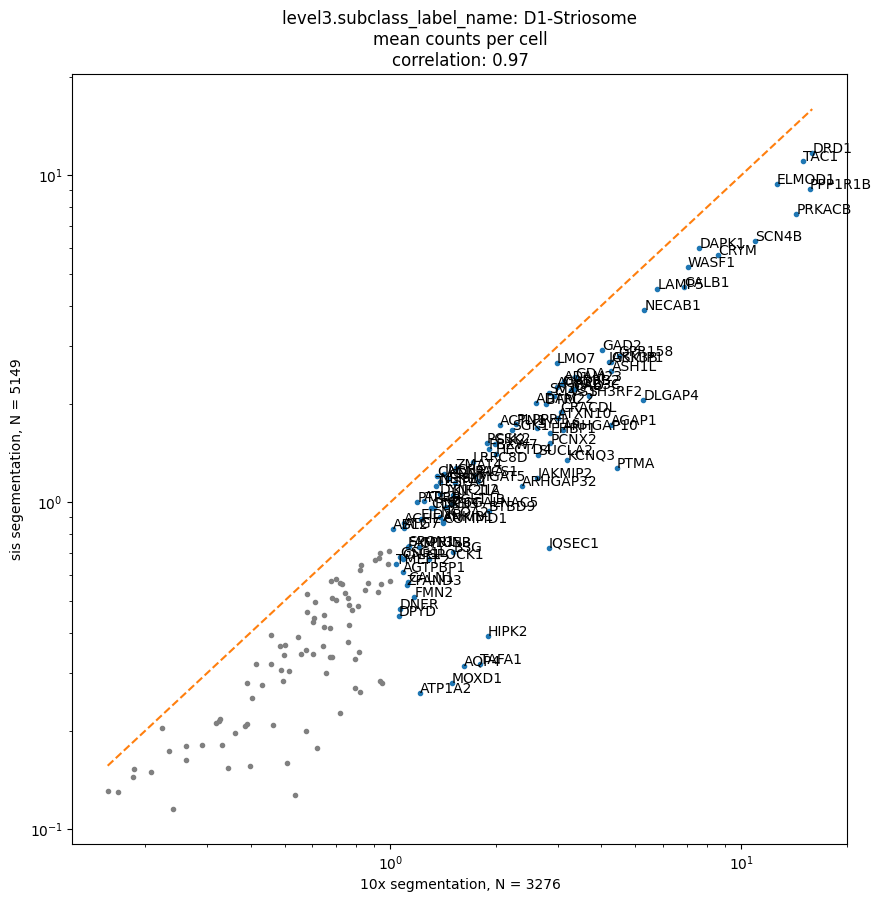

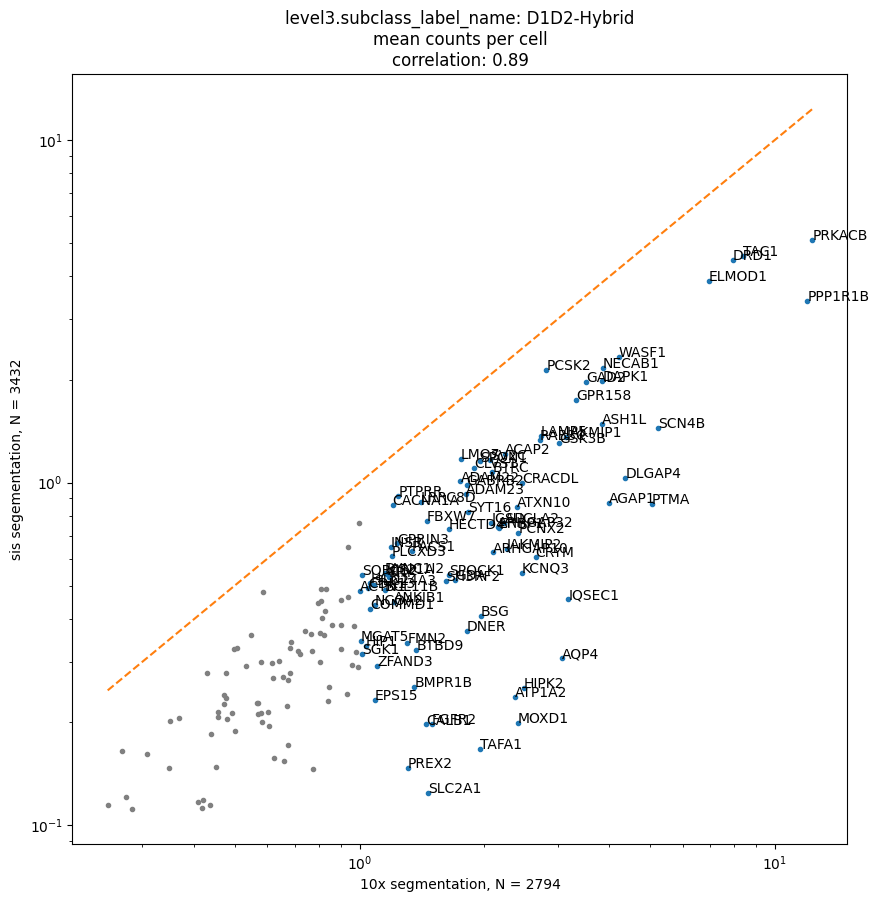

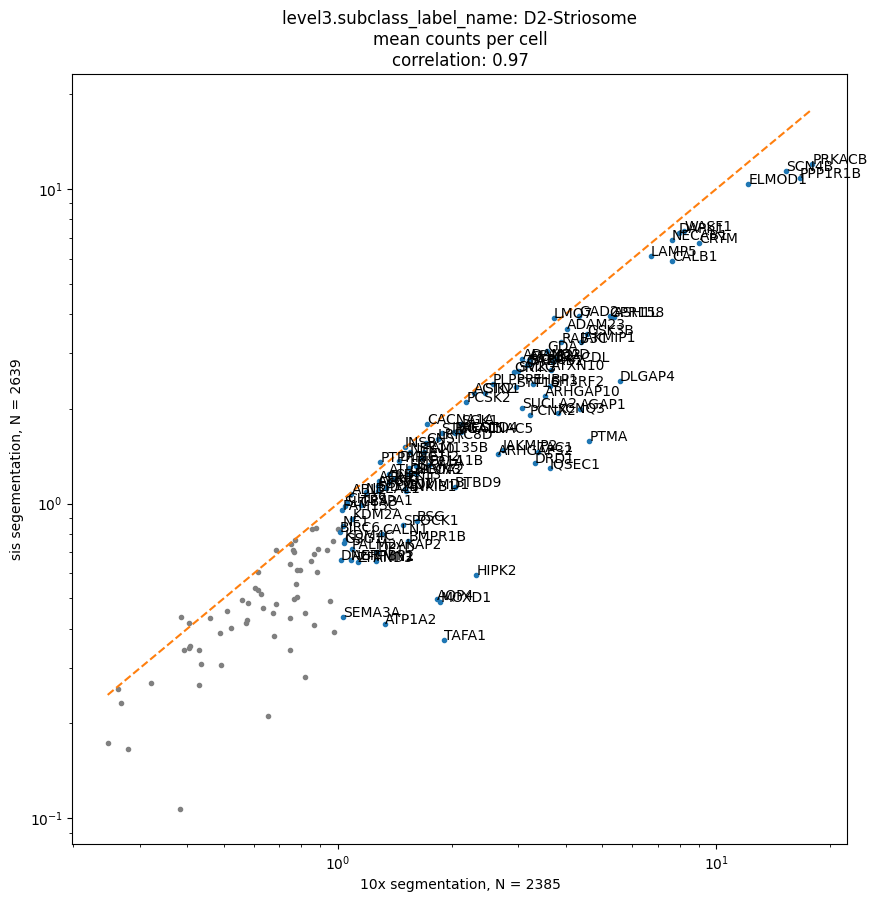

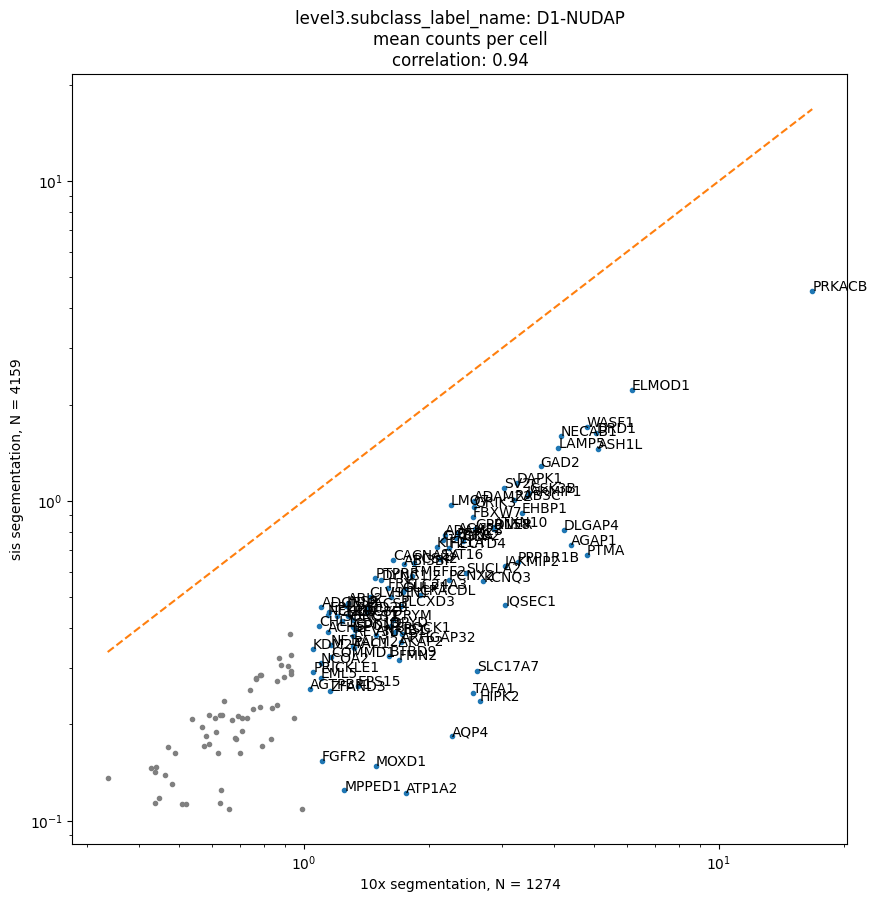

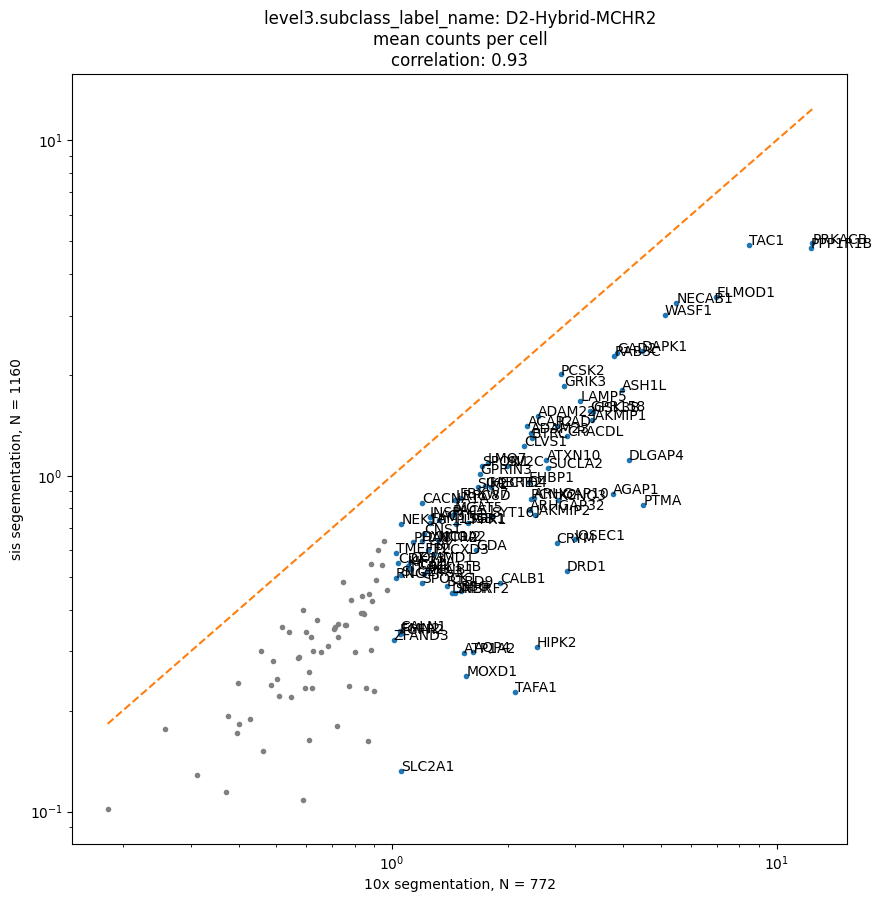

In [3]:


sc_output = spatial_compare(ad0,
            ad1,
                    data_names=["10x segmentation", "sis segementation"],
                    min_mean_expression=0.1,
    category = "level3.subclass_label_name", plot_stuff=True, spatial_plot=True,obsm_key="spatial" )


In [4]:
sc_output["expression_results"].keys()

dict_keys(['data_names', 'category_results', 'gene_ratio_dataframe'])

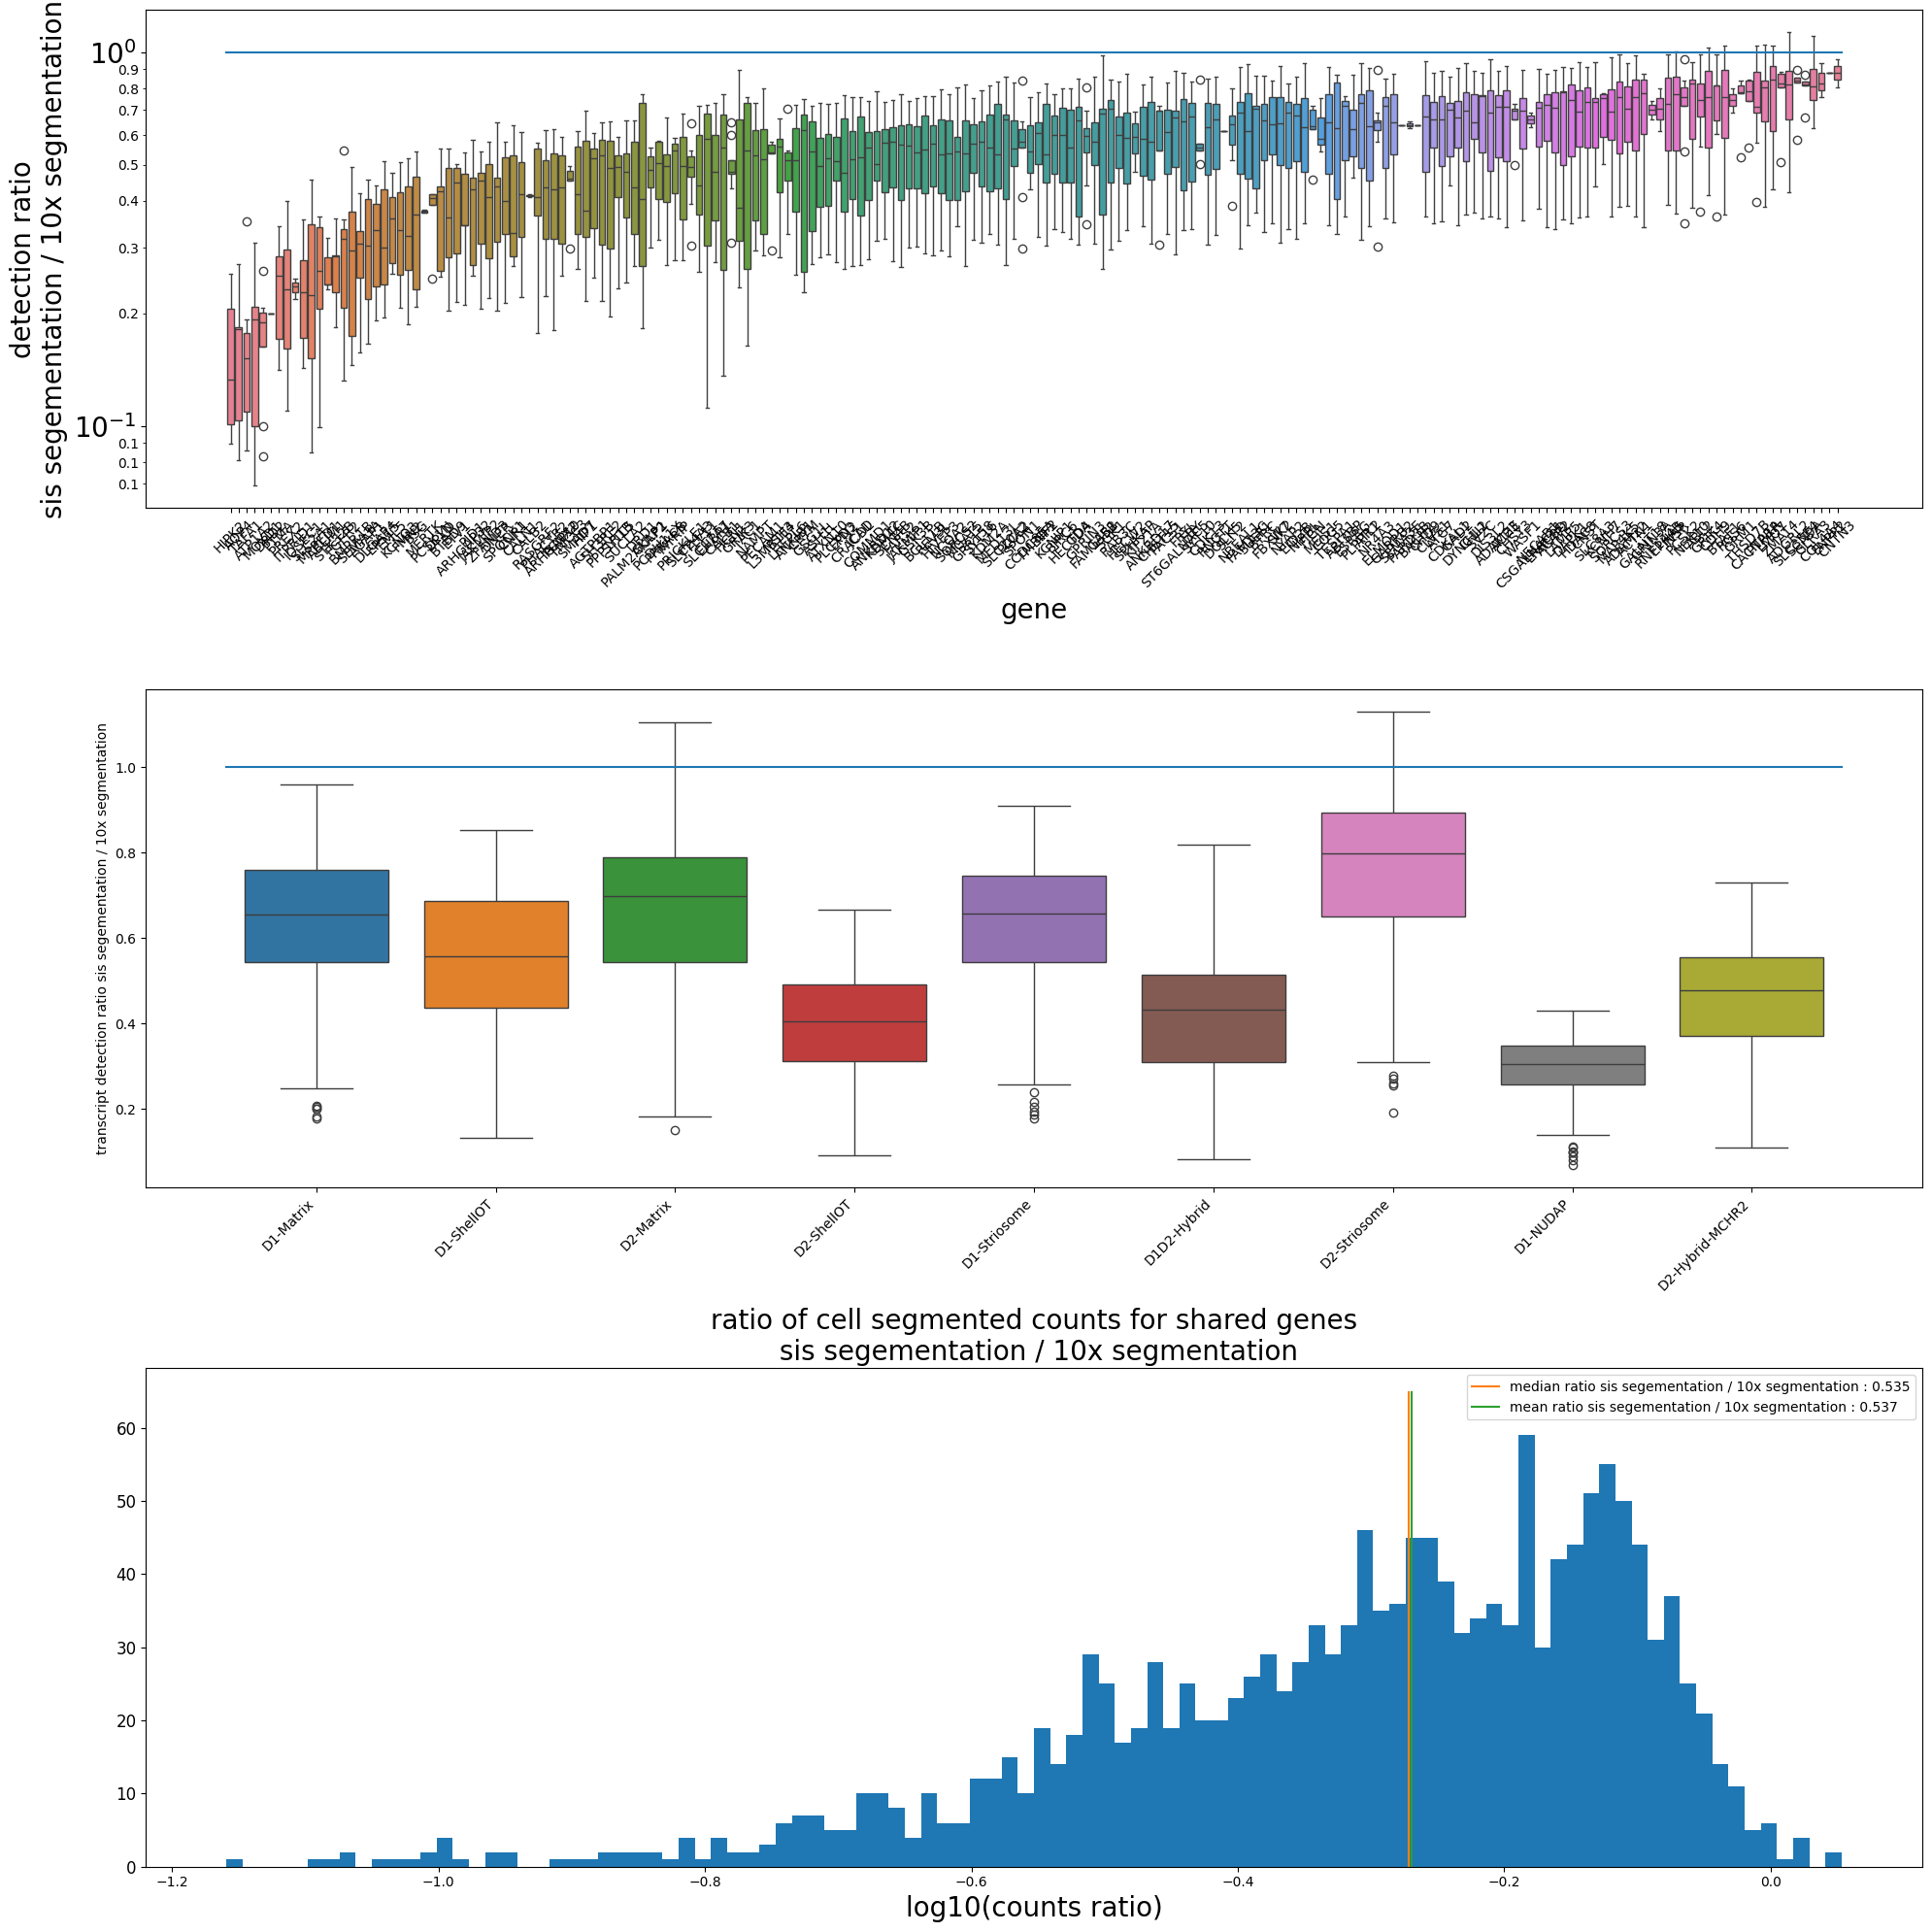

In [5]:
detection_ratio_plots(sc_output["expression_results"]["gene_ratio_dataframe"],
                      data_names=sc_output["expression_results"]["data_names"] ,figsize=[20,20])